# Titanic - Data Analysis using Pandas

In this Jupyter notebook, we will be exploring the Titanic `train.csv` dataset from Kaggle: https://www.kaggle.com/c/titanic/data.

We will be using Pandas to analyze the data set to see which passengers had higher survival rates based on the features in the data set.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file
# The csv file is not included on the github repository
titanic = pd.read_csv("data/train.csv")

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Pair Plot
Let us use a pair plot to see if there are any patterns between features and to spot any outliers.
- `PassengerId`
    - Appears to serve as an index
    - Unique integer values to identify passengers
    
The following features are qualitative:
- `Name`
- `Sex`
- `Ticket`
- `Cabin`

We notice the following `int64` features appear to be categorical/discrete:
- `Survived`
- `Pclass`
- `SibSp`
- `Parch`

The `float64` features appear to be continuous-like variables:
- `Age`
    - Not all ages are integers
- `Fare`
    - The fares are not just a few different price points

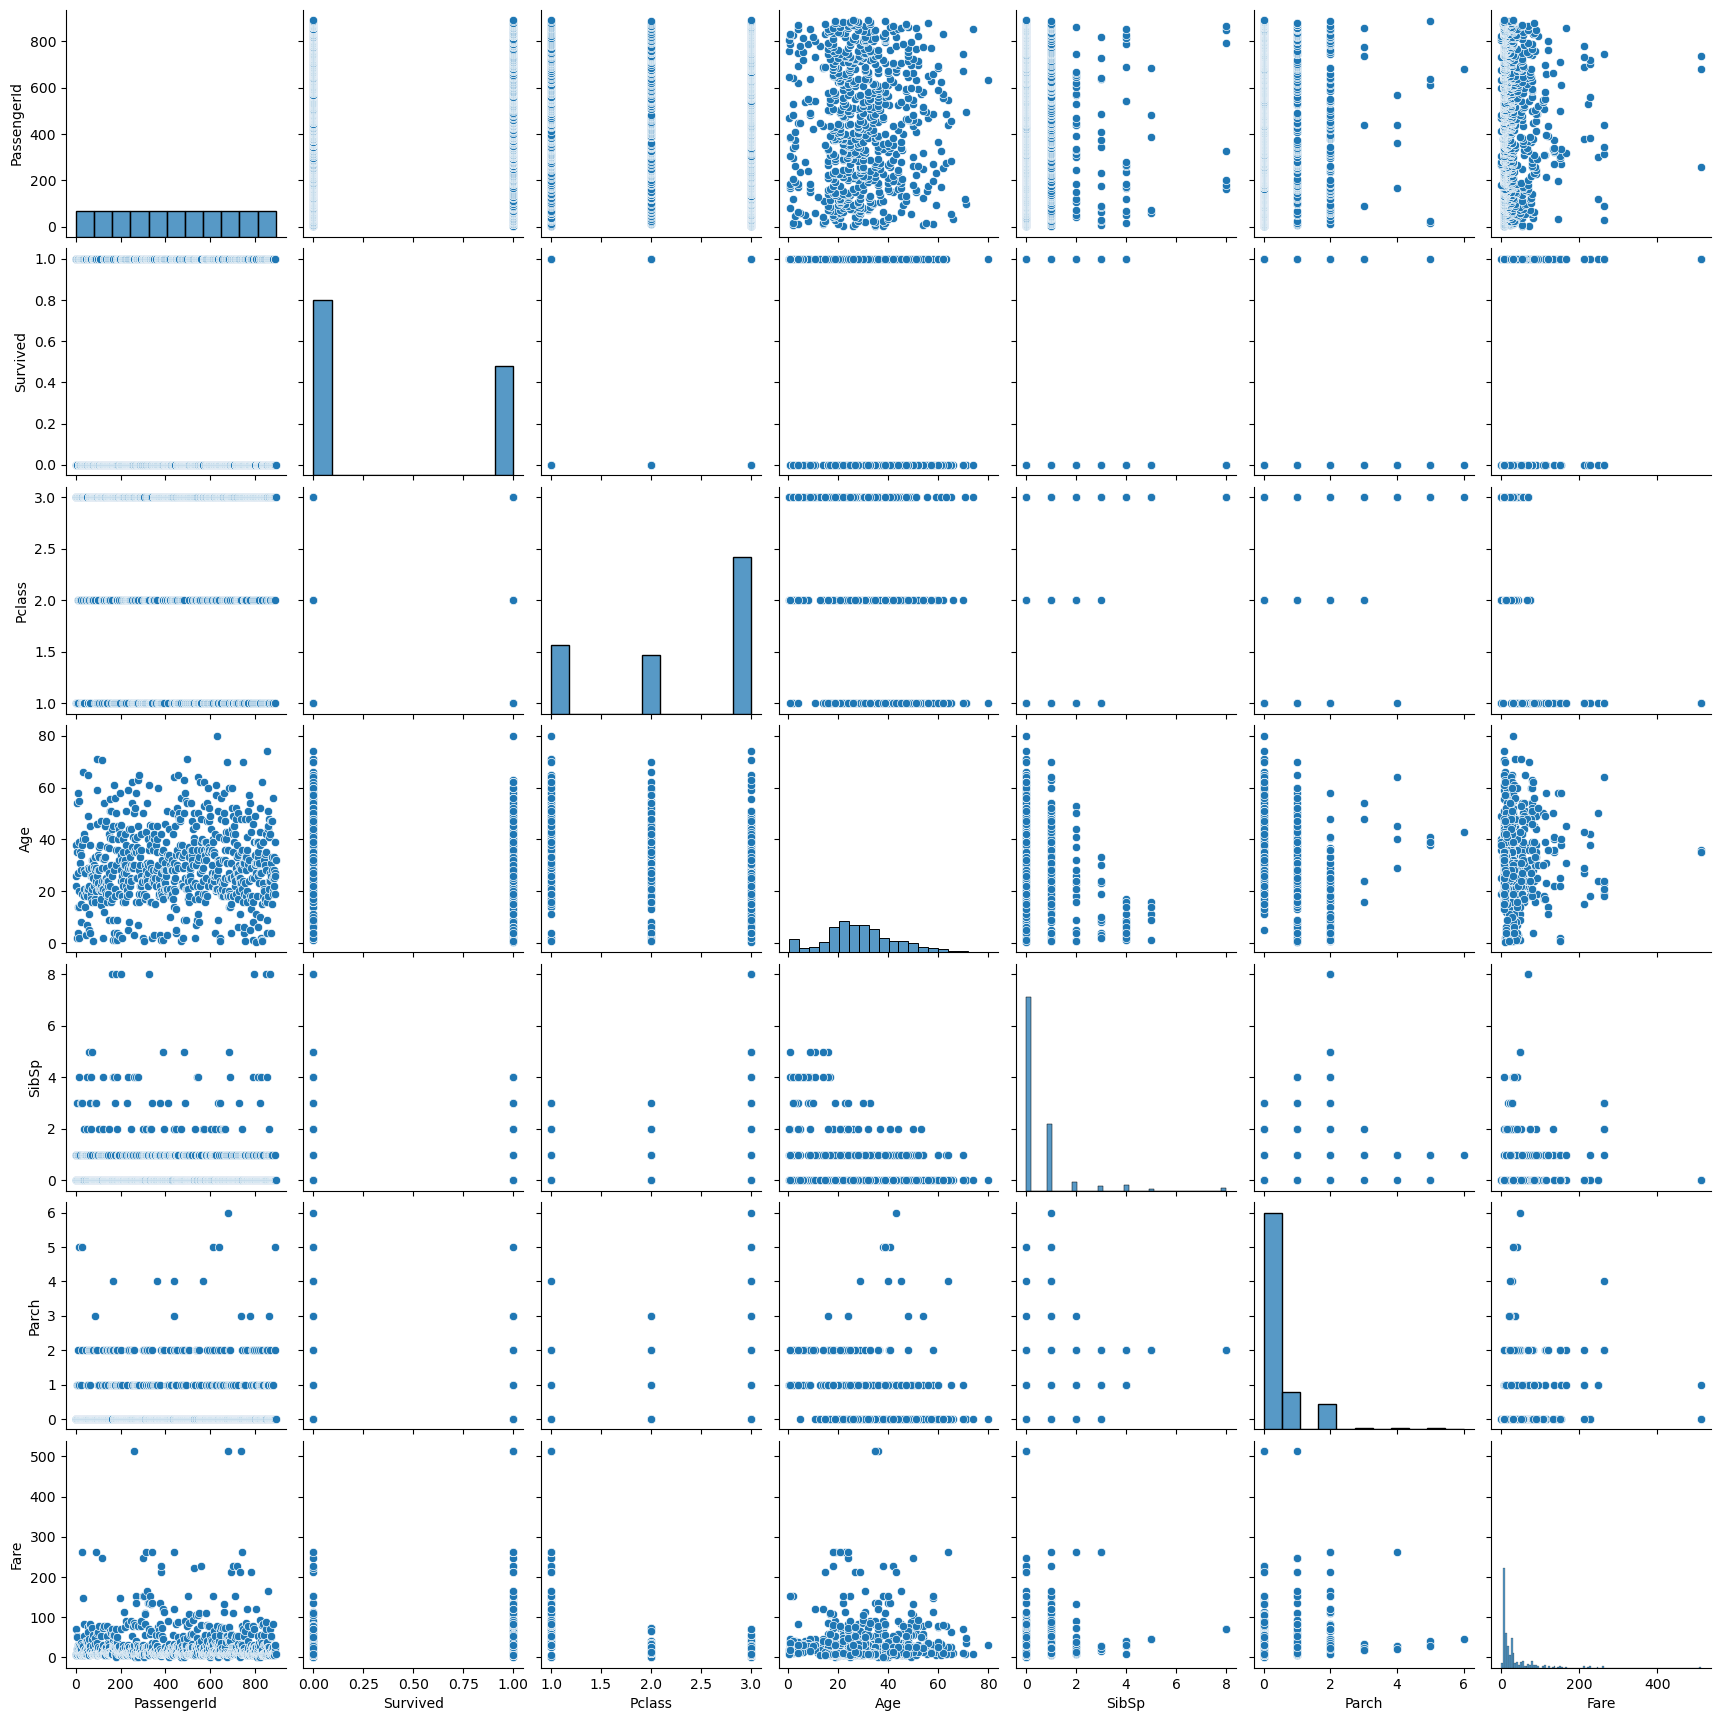

In [4]:
sns.pairplot(titanic);

### Correlation Matrix
We can try to see if there are any relationships between the numerical features using a correlation matrix.

From this, we can see the following general relationships:
- Moderate negative relationship:
    - `Fare` and `Pclass`
        - Passengers who had paid higher fares may have been more likely to be in 1st class
- Weak positive relationship:
    - `Fare` and `Parch`/`SibSp`
        - Passengers recorded with more family members may have boarded on a ticket with higher fare than those traveling alone
    - `Fare` and `Survived`
        - Passengers who had paid higher fares may have been more likely to survive than those who paid less
    - `Parch` and `SibSp`
        - Passengers with more siblings may have been on the ship with more parents than those with fewer siblings
        - Passengers with more children may have been more likely to be on the ship with their spouse
        - Passengers without children may have been less likely to have a spouse
- Weak negative relationship:
    - `Age` and `Pclass`
        - On average, 3rd class passengers may have been younger than those in 1st class
    - `Age` and `SibSp`
        - On average, passengers with more siblings on board may have been younger than those with fewer/no siblings
    - `Pclass` and `Survived`
        - 1st class passengers may have been more likely to survive than those in 3rd class

In [5]:
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Treating Missing Values
We can see there are missing values in the `Age`, `Cabin` and `Embarked` columns.

In [6]:
pd.DataFrame({"Null Count:":titanic.isnull().sum(), "% Missing:":titanic.isnull().sum()/len(titanic)}).style.format({"% Missing:":"{:.0%}"})

,Null Count:,% Missing:
PassengerId,0,0%
Survived,0,0%
Pclass,0,0%
Name,0,0%
Sex,0,0%
Age,177,20%
SibSp,0,0%
Parch,0,0%
Ticket,0,0%
Fare,0,0%


### Missing Embarked Values
Since there are only 2 missing values in the `Embarked` column, we can examinine the other features to predict what the missing values might be.

We can see that both of these passengers boarded using the same ticket and stayed in the same cabin. We notice that the `PassengerId` values are not adjacent.

In [7]:
titanic.loc[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There does not appear to be any similarities in other features for adjacent `PassengerId` values. This suggests that `PassengerId` may only serve as an index to uniquely identify passengers.

In [8]:
titanic[((titanic.PassengerId > 55) & (titanic.PassengerId < 65)) | 
        ((titanic.PassengerId > 825) & (titanic.PassengerId < 835))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
56,57,1,2,"Rugg, Miss. Emily",female,21.00,0,0,C.A. 31026,10.5000,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q


When we look at passengers with similar `Fare`, we can see that multiple passengers with the same `Ticket`, `Fare` and `Pclass` had `Embarked` at the same port. These passengers may have stayed in different `Cabin`.

We can also see that `Fare` is continuous-like, rather than a few different fixed price points. The two passengers with missing `Embarked` values appear to be the only passengers that paid a `Fare` of exactly 80.

In [9]:
titanic[(titanic.Fare > 75) & (titanic.Fare < 85)].sort_values(by='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


When  we look at adjacent ticket numbers, we see that many of the passengers boarded at Southampton 'S'.

In [10]:
titanic[(titanic.Ticket > '113000') & (titanic.Ticket < '113800')].groupby("Ticket")["Embarked"].unique()

Ticket
113028       [S]
113043       [S]
113050       [S]
113051       [C]
113055       [S]
113056       [S]
113059       [S]
113501       [S]
113503       [C]
113505       [S]
113509       [C]
113510       [S]
113514       [S]
113572     [nan]
113760       [S]
113767       [S]
113773       [S]
113776       [S]
113781       [S]
113783       [S]
113784       [S]
113786       [S]
113787       [S]
113788       [S]
113789       [S]
113792       [S]
113794       [S]
113796       [S]
113798    [S, C]
Name: Embarked, dtype: object

We can look at neighbouring `Cabim` values to see if they paid similar fares or boarded at similar ports. We see that nearby cabins `B22` and `B30` were recorded with similar but lower `Fare` than the passengers in `B28`. `Cabin` does not appear to predict `Embarked`.

In [11]:
titanic[(titanic.Cabin > 'B1') & (titanic.Cabin < 'B4')].groupby(["Cabin", "Fare"])["Embarked"].unique()

Cabin  Fare    
B101   512.3292      [C]
B102   0.0000        [S]
B18    57.9792       [C]
B19    33.5000       [S]
B20    57.0000       [S]
B22    71.0000       [S]
B28    80.0000     [nan]
B3     211.3375      [S]
B30    61.9792       [C]
B35    69.3000       [C]
B37    29.7000       [C]
B38    26.5500       [S]
B39    49.5000       [C]
Name: Embarked, dtype: object

We can see that most passengers `Embarked` at Southampton 'S'.

In [12]:
titanic.groupby(["Pclass", "Embarked"])["Embarked"].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Embarked, dtype: int64

In [13]:
titanic.groupby("Embarked")["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

Similar values of `Ticket`, `Fare` or `Cabin` do not seem to uniquely determine the `Embarked` value. However, since most passengers embarked at Southampton, this may be the best value to use to impute the null `Embarked` values.

In [14]:
titanic['Embarked'] = titanic["Embarked"].fillna("S")

### Missing Age Values
The `Age` column is missing 177 values (20%). Since it is missing more than 10% but less than 50% of its values, it would be best to try to fill in these values. 

Using the `.describe()` function, we can see in the data set that the youngest recorded age is 0.42 and the oldest is 80, the mean age is about 30 and the median age is 28. This suggests that age is slightly right-skewed.

In [15]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We can look at how other attributes relate with the `Age` of the passengers to try to fill in the null values. The following procedure may be useful to visualize our data.

In [16]:
def plothist(x, groupby, bins=15, alpha=1, stacked=False, legend_label=None):
    '''Plot histogram of data x, grouped together by groupby column'''
    titanic.pivot(columns=groupby)[x].plot(kind='hist', bins=bins, alpha=alpha, stacked=stacked)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    
    if legend_label is None:
        g_label = groupby
    else:
        g_label = legend_label
    
    plt.title('{} Distribution by {}'.format(x, g_label))
    plt.legend(title=g_label)

#### Age vs Survived
We can see that the mean `Age` of those who survived was less than that of those who did not survive. The median age of these two groups are the same. We also notice that most of the passengers with missing `Age` values did not survive.

In [17]:
titanic.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [18]:
titanic.loc[titanic["Age"].isnull()].groupby("Survived")["Survived"].count()

Survived
0    125
1     52
Name: Survived, dtype: int64

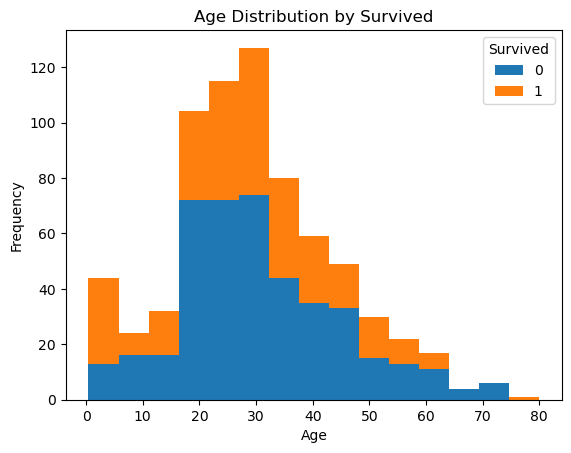

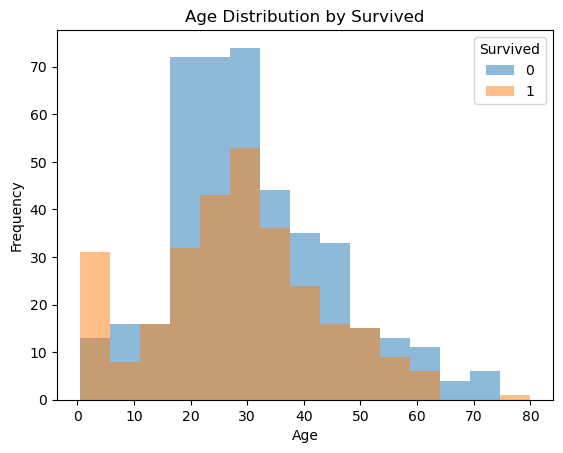

In [19]:
plothist('Age', 'Survived', stacked=True)
plothist('Age', 'Survived', alpha=0.5)

#### Age vs Passenger Class
Upper class (1st class) passengers were on average older than those in lower classes (2nd and 3rd class). About half of the passengers were in 3rd class. 3rd class passengers were more likely to have missing `Age`. The distributions of `Age` appear to be slightly right-skewed.

In [20]:
titanic.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [21]:
# Number of missing Age values by Class
titanic.loc[titanic["Age"].isnull()].groupby("Pclass")["Pclass"].count()

Pclass
1     30
2     11
3    136
Name: Pclass, dtype: int64

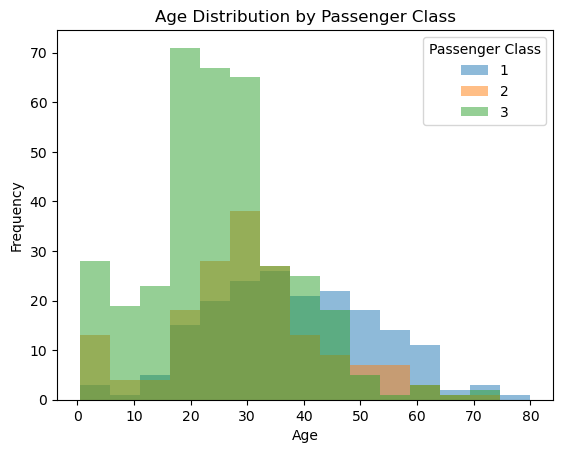

In [22]:
plothist('Age', 'Pclass', alpha=0.5, legend_label='Passenger Class')

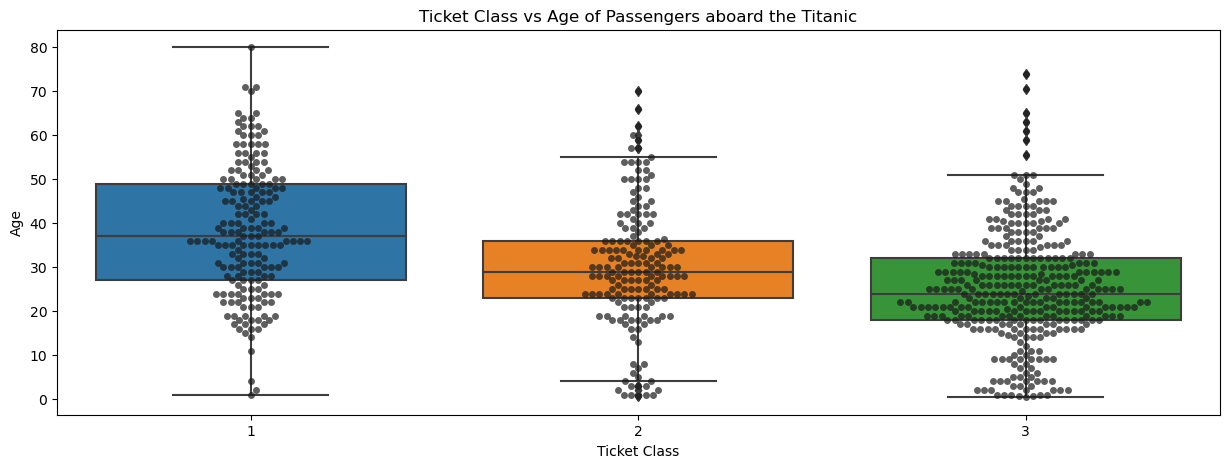

In [23]:
plt.figure(figsize =(15, 5))
sns.boxplot(x ='Pclass', y ='Age', saturation = 0.8, data = titanic)
sns.swarmplot(x=titanic['Pclass'], y=titanic['Age'], alpha=0.7, color="0.1")
plt.xlabel("Ticket Class")
plt.title("Ticket Class vs Age of Passengers aboard the Titanic")
plt.show();

#### Age vs Sex
About two-thirds of the passengers were male, who were on average about 3 years older than the female passengers.

In [24]:
titanic.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [25]:
# Number of missing Age values by Sex
titanic.loc[titanic["Age"].isnull()].groupby("Sex")["Sex"].count()

Sex
female     53
male      124
Name: Sex, dtype: int64

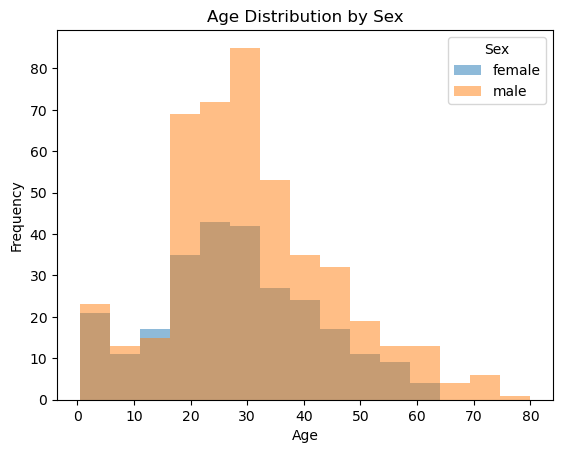

In [26]:
plothist('Age', 'Sex', alpha=0.5)

#### Age vs Siblings/Spouses
We notice that the majority of passengers did not have siblings or a spouse. Passengers with more siblings aboard were on average younger than those without any siblings. We notice there are 7 passengers recorded with 8 `SibSp` and missing `Age`.

In [27]:
titanic.groupby("SibSp")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Number of missing Age values by Siblings/Spouse
titanic.loc[titanic["Age"].isnull()].groupby("SibSp")["SibSp"].count()

SibSp
0    137
1     26
2      3
3      4
8      7
Name: SibSp, dtype: int64

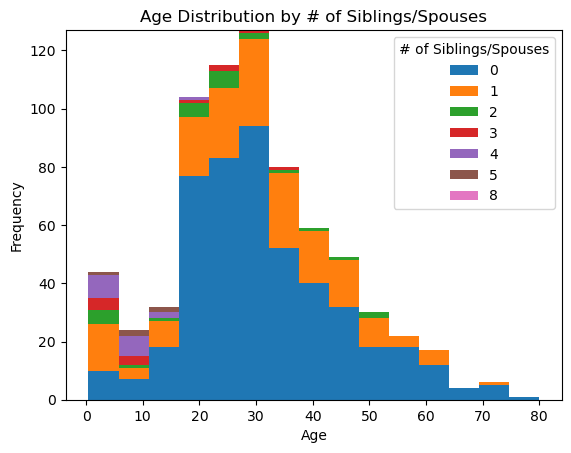

In [29]:
plothist('Age', 'SibSp', stacked=True, legend_label='# of Siblings/Spouses')

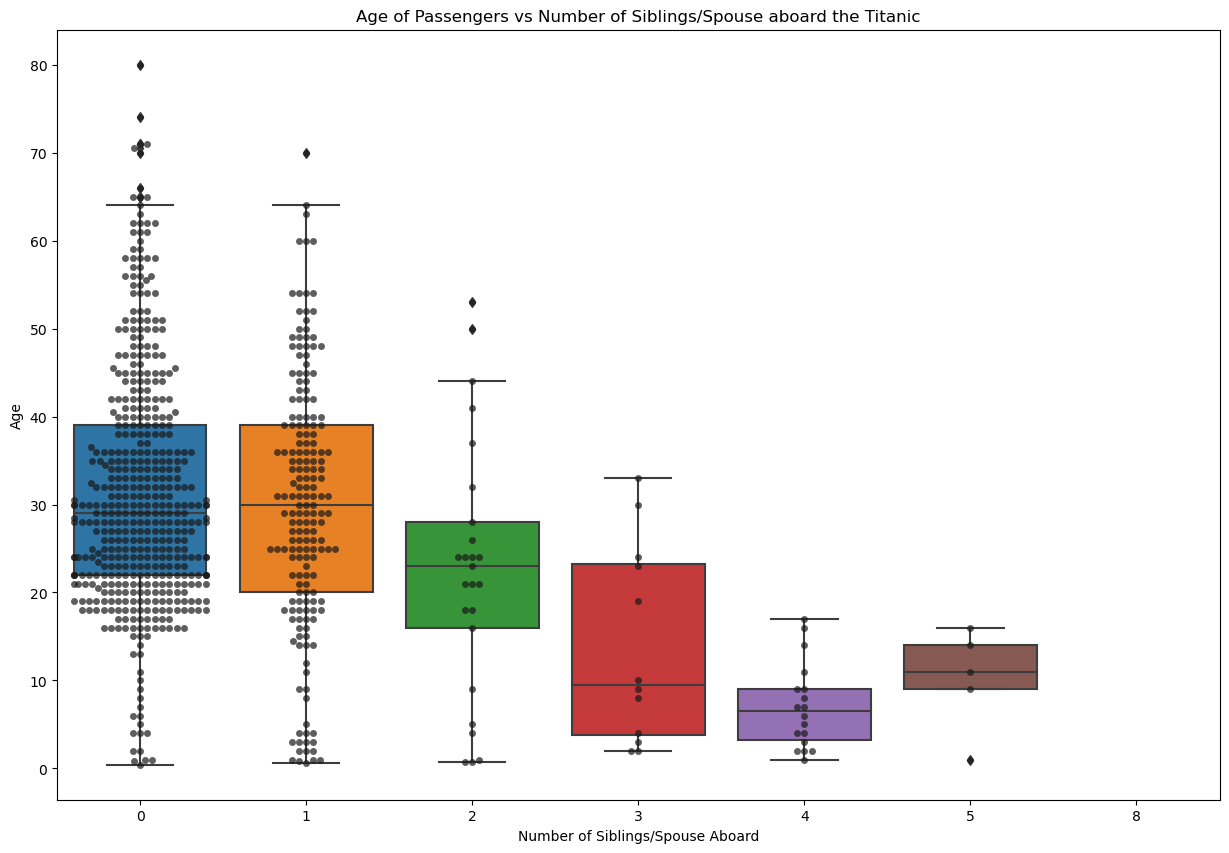

In [30]:
plt.figure(figsize =(15, 10))
sns.boxplot(x ='SibSp', y ='Age', saturation = 0.8, data = titanic)
sns.swarmplot(x=titanic['SibSp'], y=titanic['Age'], alpha=0.7, color="0.1")
plt.xlabel("Number of Siblings/Spouse Aboard")
plt.title("Age of Passengers vs Number of Siblings/Spouse aboard the Titanic")
plt.show();

#### Age vs Parents/Children
We notice that passengers recorded with 2 parents/children tended to be younger, perhaps due to the number of children on board with both parents. The passengers with 3 or more `Parch` were on average between the ages of 33 and 45, suggesting they were more likely to be parents with multiple children.

In [31]:
titanic.groupby("Parch")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Parch,,,,,,,,
0,521.0,32.178503,12.570448,5.00,22.00,30.0,39.00,80.0
1,110.0,24.422000,18.283117,0.42,6.25,23.0,39.00,70.0
2,68.0,17.216912,13.193924,0.83,5.75,16.5,25.00,58.0
3,5.0,33.200000,16.709279,16.00,24.00,24.0,48.00,54.0
4,4.0,44.500000,14.617341,29.00,37.25,42.5,49.75,64.0
5,5.0,39.200000,1.095445,38.00,39.00,39.0,39.00,41.0
6,1.0,43.000000,NaN,43.00,43.00,43.0,43.00,43.0


We can get an idea about the sizes of the families in the data set by grouping together passengers by `Parch` and `SibSb`. We can see that the passengers with more `SibSp` tended to be travelling with one or two parents (or children, but probably parents). We can also see the passengers travelling with more `Parch` were either travelling by themselves or with 1 `SibSp`.

In [32]:
titanic.groupby(['Parch', 'SibSp'])['PassengerId'].count()

Parch  SibSp
0      0        537
       1        123
       2         16
       3          2
1      0         38
       1         57
       2          7
       3          7
       4          9
2      0         29
       1         19
       2          4
       3          7
       4          9
       5          5
       8          7
3      0          1
       1          3
       2          1
4      0          1
       1          3
5      0          2
       1          3
6      1          1
Name: PassengerId, dtype: int64

In [33]:
# Number of missing Age values by Parents/Children
titanic.loc[titanic["Age"].isnull()].groupby("Parch")["Parch"].count()

Parch
0    157
1      8
2     12
Name: Parch, dtype: int64

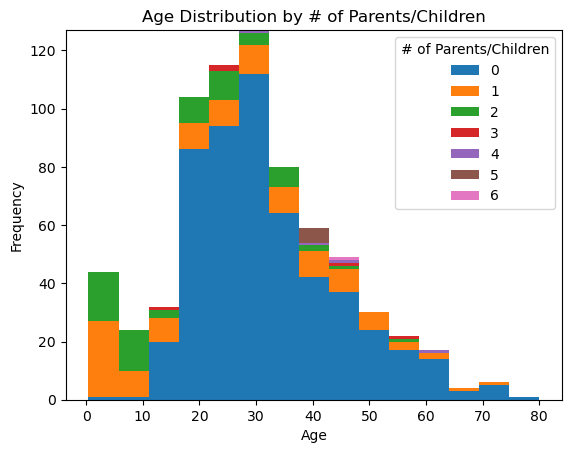

In [34]:
plothist('Age', 'Parch', stacked=True, legend_label='# of Parents/Children')

#### Age vs Port Embarked
Passengers who `Embarked` at Cherbourg 'C' appear to be slightly older (mean and median) than those who `Embarked` at other ports.

In [35]:
titanic.groupby("Embarked")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,130.0,30.814769,15.434860,0.42,21.25,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,556.0,29.519335,14.189608,0.67,21.00,28.0,38.0,80.0


In [36]:
# Number of missing Age values by Parents/Children
titanic.loc[titanic["Age"].isnull()].groupby("Embarked")["Embarked"].count()

Embarked
C    38
Q    49
S    90
Name: Embarked, dtype: int64

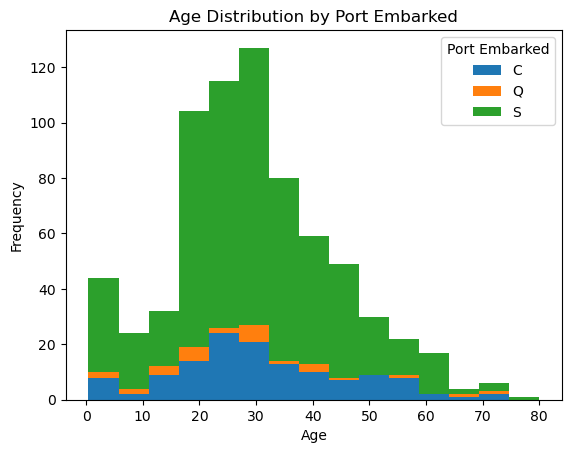

In [37]:
plothist('Age', 'Embarked', stacked=True, legend_label='Port Embarked')

### Grouping Fare Ranges
Looking at the `Fare` attribute with `.describe()`, we see fares ranged from 0 to about 512. We can group the `Fare` values into intervals to hopefully gain insights on the relationship of `Fare` with other attributes of the data set.

The intervals chosen will be exclusive of the right bound defined in interval notation as: \[0,10\), \[10,25\), \[25,50\), \[50,600\).

In [38]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

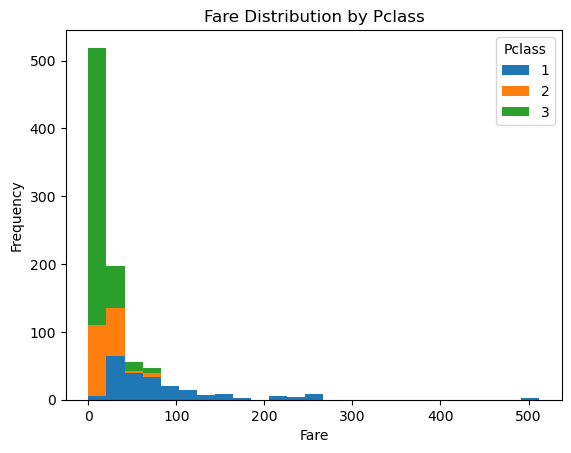

In [39]:
plothist('Fare', 'Pclass', bins=25, stacked=True)

In [40]:
fare_bins = [0, 10, 25, 50, 600]
fare_bins_labels = ["0-10", "10-25", "25-50", "50+"]
titanic["FareRange"] = pd.cut(titanic['Fare'], fare_bins, right=False, labels=fare_bins_labels)

In [41]:
numpass = titanic.groupby("FareRange")["FareRange"].count()
nummissing_byFareRange = titanic.loc[titanic["Age"].isnull()].groupby("FareRange")["FareRange"].count()
nummissing = len(titanic.loc[titanic["Age"].isnull()])
pd.DataFrame({"# Passengers": numpass,
              "Prop of Passengers": numpass/len(titanic),
              "Missing Age":nummissing_byFareRange,
              "% Missing for FareRange":nummissing_byFareRange/numpass,
              "Prop of Missing Age":nummissing_byFareRange/nummissing}).style.format(
                {"Prop of Passengers":"{:.1%}",
                 "% Missing for FareRange":"{:.1%}",
                 "Prop of Missing Age":"{:.1%}"})

,# Passengers,Prop of Passengers,Missing Age,% Missing for FareRange,Prop of Missing Age
FareRange,,,,,
0-10,336,37.7%,100,29.8%,56.5%
10-25,221,24.8%,34,15.4%,19.2%
25-50,173,19.4%,20,11.6%,11.3%
50+,161,18.1%,23,14.3%,13.0%


From this, we see that passengers in the "0-10" interval make up 37.7% of all passengers aboard but make up 56.5% of the data points with missing `Age`. In other words, those who paid less for their tickets were less likely to have their `Age` recorded.

We will look at the relationship between `FareRange` and `Age` by plotting the distribution of ages grouped by `FareRange`.

In [42]:
titanic.groupby("FareRange")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
FareRange,,,,,,,,
0-10,236.0,28.156441,10.810088,0.42,20.875,25.0,33.0,74.0
10-25,187.0,27.208556,14.066495,0.67,18.500,28.0,34.0,70.0
25-50,153.0,30.335490,18.755774,0.83,14.000,31.0,44.0,80.0
50+,138.0,35.006667,14.051636,0.92,24.000,35.0,46.0,70.0


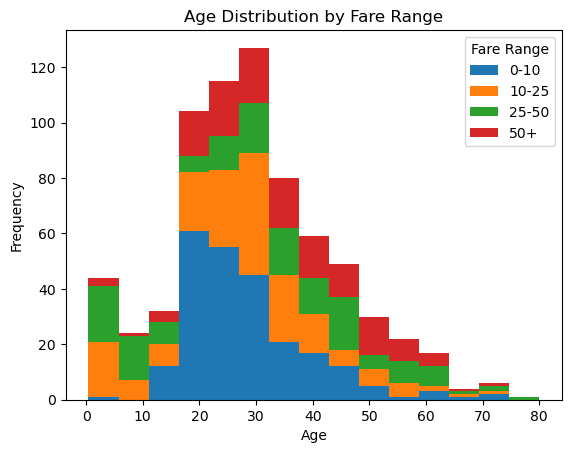

In [43]:
plothist('Age', 'FareRange', stacked=True, legend_label='Fare Range')

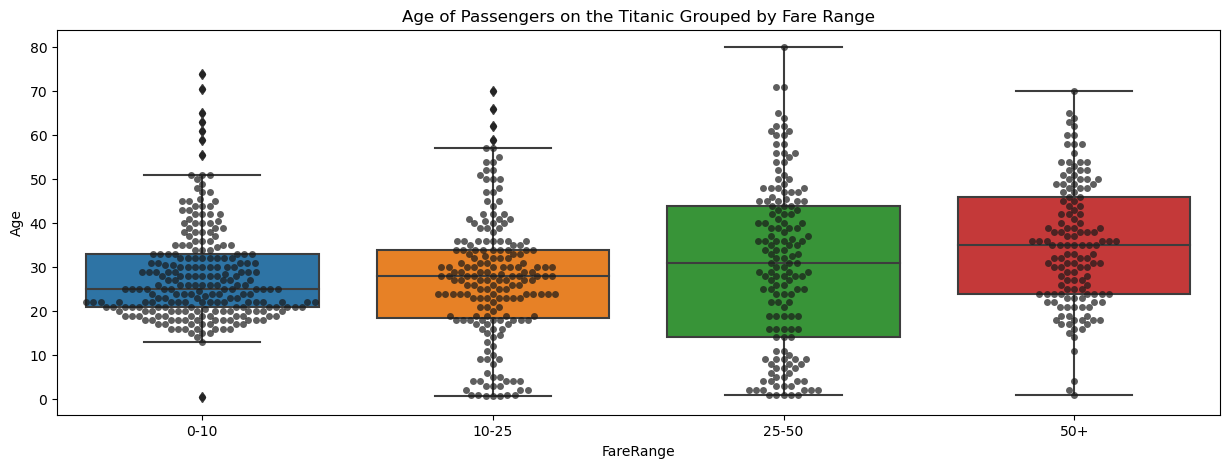

In [44]:
plt.figure(figsize =(15, 5))
sns.boxplot(x ='FareRange', y ='Age', saturation = 0.8, data = titanic)
sns.swarmplot(x=titanic['FareRange'], y=titanic['Age'], alpha=0.7, color="0.1")
plt.title("Age of Passengers on the Titanic Grouped by Fare Range")
plt.show();

We see that the data points in the "0-10" `FareRange` category varied less in `Age`.
- 50% of these passengers were between the ages of 21 and 33 (1st and 3rd quartiles)
- Mean age of 28
- Median age of 25. 

There was more variation in age among passengers who paid higher fares. There were more children under 10 years-old in the "10-25" and "25-50" fare intervals than in "0-10". The median ages were also higher in these `FareRange` categories: 28 for those who paid between "10-25", 31 for those of the "25-50" interval and 35 for the "50+" category.

We can hypothesize that those who bought cheaper fares were more likely to be of younger working age (early 20s), probably with little financial means, who were searching for employment across the ocean. Passengers who paid for more for their tickets were more likely to be older and richer, including those who may have brought their children.

#### Fare Ranges vs Pclass
We can see that if we group passengers by their `Pclass`, we see the differences in the distributions of `Fare`. As it follows from intuition, passengers in 1st class tended to pay higher fares compared to those in 3rd class.

In [45]:
titanic.groupby("Pclass")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


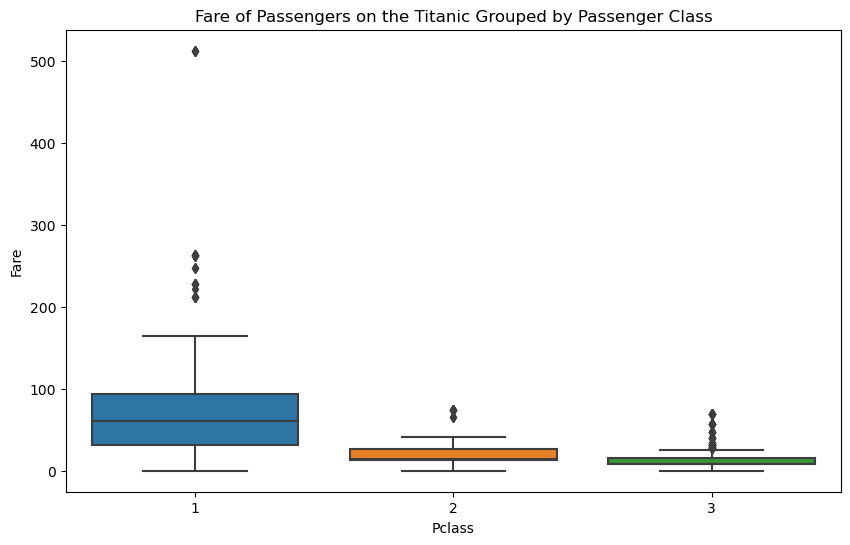

In [46]:
plt.figure(figsize =(10, 6))
sns.boxplot(x ='Pclass', y ='Fare', saturation = 0.8, data = titanic)
plt.title("Fare of Passengers on the Titanic Grouped by Passenger Class")
plt.show();

If we look at the distribution of passengers grouped by `FareRange` and `Pclass`, as we might have expected, we see that those who paid lower `Fare` were more likely to be in 3rd class and those who paid more were more likely to be in 1st class.

There appears to be some outliers, where some passengers in the "0-10" `FareRange` category were in 1st or 2nd class and some passengers in the "50+" category were in 2nd or 3rd class.

In [47]:
titanic.groupby(['FareRange',"Pclass"])["Pclass"].count()

FareRange  Pclass
0-10       1           6
           2           6
           3         324
10-25      1           0
           2         110
           3         111
25-50      1          70
           2          61
           3          42
50+        1         140
           2           7
           3          14
Name: Pclass, dtype: int64

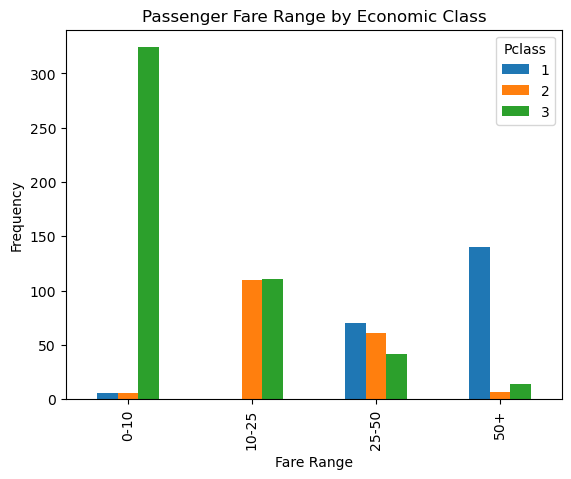

In [48]:
pd.crosstab(titanic.FareRange, titanic.Pclass).plot(kind='bar')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')
plt.title('Passenger Fare Range by Economic Class');

In [49]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50+
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50+
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,10-25
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,25-50
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,10-25
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,25-50


#### First Class "0-10" Passengers
Taking a closer look at the 1st class passengers who paid "0-10", we see that these were male passengers who were recorded to have paid either no fare or a `Fare` of 5. Those with recorded age were between 38 and 40, which is near the mean age of 1st class passengers (38).

In [50]:
titanic.loc[(titanic["FareRange"] == "0-10") & (titanic["Pclass"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0-10
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0-10
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,0-10
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,0-10
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0-10
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,0-10


#### Second Class "0-10" Passengers
We also noticed the anomaly of 2nd class passengers who paid "0-10". These passengers paid no fare and were not recorded with their ages. They were all male with similar `Ticket` numbers and `Embarked` at the same port.

In [51]:
titanic.loc[(titanic["FareRange"] == "0-10") & (titanic["Pclass"] == 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0-10
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0-10
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0-10
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0-10
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,0-10
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,0-10


#### Updating "0" Fare Passengers
Out of all passengers that paid no fare, only those in 1st and 2nd class have their ages missing. 

Since these passengers seem to be outliers, it would be better to treat them separate from other passengers of the "0-10" category by relabelling them with the `FareRange` value of 0. We will choose to fill in the null `Age` values of these passengers with the mean age of their respective `Pclass`. 

In [52]:
titanic.loc[(titanic["Fare"] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0-10
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0-10
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0-10
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0-10
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0-10
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0-10
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0-10
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0-10
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0-10
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0-10


In [53]:
# Updating FareRange values of passengers that paid no fare to be "0"
titanic.FareRange = np.where(titanic.Fare == 0, 0, titanic.FareRange)

In [54]:
# Filling NaN of passengers that paid no fare with the mean age of their respective Pclass
titanic.loc[(titanic["Fare"] == 0), "Age"] = titanic.loc[(titanic["Fare"] == 0), "Age"].fillna(titanic.groupby("Pclass")["Age"].transform("mean"))

In [55]:
# Verify that such passengers have been reclassified and have had their NaN ages updated
titanic.loc[(titanic["Fare"] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.877630,0,0,239853,0.0,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.877630,0,0,239853,0.0,NaN,S,0
466,467,0,2,"Campbell, Mr. William",male,29.877630,0,0,239853,0.0,NaN,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.877630,0,0,239854,0.0,NaN,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.233441,0,0,112052,0.0,NaN,S,0


#### Second Class "50+" Passengers
Looking at 2nd class passengers who paid "50+", these passengers appear to have either the `Ticket` "S.O.C 14879" or "220845", `Embarked` at Southampton (S) and were missing `Cabin` values. Most of these passengers appear to be under 25. Since none of these passengers have missing `Age` values, we can ignore them for now.

In [56]:
titanic.loc[(titanic["FareRange"] == "50+") & (titanic["Pclass"] == 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S,50+
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S,50+
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,50+
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,NaN,S,50+
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S,50+
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S,50+
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,NaN,S,50+


#### Third Class "50+" Passengers
When we look at 3rd class passenger who paid "50+", we notice that these passengers with last name "Sage", each with `SibSp` value of 8 and `Ticket` "CA. 2343" or they were men of Asian descent (based on their names) with `Ticket` "1601".

In [57]:
titanic.loc[(titanic["FareRange"] == "50+") & (titanic["Pclass"] == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,50+
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,50+
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,50+
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,50+
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,50+
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,50+


We will treat these data points as outliers and separate these data points from the "50+" `FareRange` category. The Sage family members will be reclassified as "50+S" and the male passengers of Asian descent will be reclassified as "50+A".

#### Replacing FareRange for Third Class "50+" Passengers

In [58]:
titanic[titanic.Ticket.isin(['CA. 2343', '1601'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,50+
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,50+
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,50+
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,50+
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,50+
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,50+
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,50+


In [59]:
titanic['FareRange'] = np.where(titanic.Ticket == 'CA. 2343', '50+S', titanic.FareRange)
titanic['FareRange'] = np.where(titanic.Ticket == '1601', '50+A', titanic.FareRange)

#### "50+S" Sage Family
There are 7 members of the Sage family recorded in the data set, despite recorded as having a `SibSp` value of 8 and a `Parch` value of 2. This may be due to the train-test split on the original data set. As a result, some of the Sage family members may be missing in this data set. If we check on Kaggle, we can see that there are indeed other Sage family members recorded in the testing data set with the same ticket number.

The size of the family also explains why these passengers paid more for their fare despite being in 3rd class, since the one ticket covers the entire family.

Earlier, we found that passengers with a `SibSp` value of 3 or more tended to be younger (average age around 7-14) than those with a `SibSp` value less than 3. We will use the mean age of passengers with a `SibSp` value 3+ as a rough approximant to fill the null `Age` values of these Sage family members.

In [60]:
# Filling NaN Age values of Sage family members to be the median age of passengers with more than 2 siblings on board
titanic.loc[titanic.FareRange == "50+S", 'Age'] = titanic.loc[titanic.FareRange == "50+S", 'Age'].fillna(titanic.loc[titanic["SibSp"] > 2]["Age"].mean())

In [61]:
titanic.loc[(titanic["FareRange"] == "50+S")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
159,160,0,3,"Sage, Master. Thomas Henry",male,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
180,181,0,3,"Sage, Miss. Constance Gladys",female,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
201,202,0,3,"Sage, Mr. Frederick",male,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
324,325,0,3,"Sage, Mr. George John Jr",male,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
792,793,0,3,"Sage, Miss. Stella Anna",female,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,9.857143,8,2,CA. 2343,69.55,NaN,S,50+S


#### "50+A" Asian Descent
The passengers of this category were all covered by the same ticket, explaining why they were also in 3rd class but recorded with a `Fare` greater than 50.

Considering the passengers classified under "50+A", the ages of those with recorded age appear to be between 26-32. This is similar to the median age of 28 of all passengers. We will use this median age to fill their null `Age` values.

In [62]:
# Filling NaN values of "50+A" passengers with median age of all passengers
titanic.loc[titanic.FareRange == "50+A", 'Age'] = titanic.loc[titanic.FareRange == "50+A", 'Age'].fillna(titanic["Age"].median())

In [63]:
titanic.loc[titanic.FareRange == "50+A"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,50+A
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,50+A
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,50+A
643,644,1,3,"Foo, Mr. Choong",male,28.0,0,0,1601,56.4958,NaN,S,50+A
692,693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,NaN,S,50+A
826,827,0,3,"Lam, Mr. Len",male,28.0,0,0,1601,56.4958,NaN,S,50+A
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,50+A


In [64]:
# To confirm NaN filling
titanic.loc[titanic["FareRange"] == "50+A"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,50+A
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,50+A
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,50+A
643,644,1,3,"Foo, Mr. Choong",male,28.0,0,0,1601,56.4958,NaN,S,50+A
692,693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,NaN,S,50+A
826,827,0,3,"Lam, Mr. Len",male,28.0,0,0,1601,56.4958,NaN,S,50+A
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,50+A


#### Remaining Missing Age Values
Since there does not appear to be any other obvious outliers, we will treat the remaining null `Age` values by filling with the median age of their respective `FareRange` categories.

Alternatively, we could choose to use the median ages of passengers grouped by `Pclass`. 

When we look at the spread of the age distributions (standard deviation), there appears to be smaller variation in `Age` for most `FareRange` categories for most `Pclass` categories, with the exception of the `FareRange` '25-50'. However, we see that at least 75% of the data points missing `Age` values paid a `Fare` under '25' and did not board with family. This suggests that the median ages of `FareRange` might be a slightly better approximation to use to fill in missing values.

We also note that the distributions of `Age` for grouped by `FareRange` appear to be slightly right-skewed. This motivates our choice of filling the data with the median value rather than the mean value.

In [65]:
titanic[titanic.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0-10
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,10-25
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0-10
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0-10
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,50+
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0-10
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0-10
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0-10


In [66]:
titanic[titanic.Age.isna()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,159.000000,159.000000,159.000000,0.0,159.000000,159.000000,159.000000
mean,421.779874,0.314465,2.616352,NaN,0.276730,0.113208,20.539175
std,247.891147,0.465770,0.769668,NaN,0.625532,0.405362,31.342392
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,6.858300
25%,219.500000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,429.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,602.500000,1.000000,3.000000,NaN,0.000000,0.000000,22.804150
max,889.000000,1.000000,3.000000,NaN,3.000000,2.000000,227.525000


In [67]:
# Filling NaN Age values of all other passengers with the median age of their FareRange
titanic['Age'] = titanic["Age"].fillna(titanic.groupby("FareRange")["Age"].transform("median"))

### Missing Cabin Values
Since `Cabin` is missing 687 values (77% of the data). It would be difficult to fill in these values. We can drop this column.

In [68]:
titanic = titanic.drop("Cabin", axis=1)

In [69]:
# Confirm we have no more null values in the Age column:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FareRange    891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Number of Passengers on Same Ticket
As we saw above, multiple passengers may board together on the same `Ticket`. It is possible that the recorded `Fare` may be the total fare covered for all passengers on the same ticket.

We can see that there is only one `Ticket` that is associated with more than 1 `Fare` value. All other tickets are associated with only one `Fare` value.

In [70]:
titanic.groupby(['Ticket'])['Fare'].nunique()[titanic.groupby(['Ticket'])['Fare'].nunique() > 1]

Ticket
7534    2
Name: Fare, dtype: int64

In [71]:
titanic[titanic.Ticket == '7534']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareRange
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,S,0-10
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S,0-10


We can see that each `Ticket` is only associated with one `Pclass`. In other words, passengers riding on the same `Ticket` are in the same `Pclass`.

In [72]:
(titanic.groupby(['Ticket'])['Pclass'].nunique() > 1).sum()

0

We can count to see how many passengers are associated with the same `Ticket` and `Fare`.

In [73]:
tix_fare = titanic.groupby(['Ticket', 'Fare'])['PassengerId'].count().rename('N_Passengers').reset_index()
tix_fare['Pclass'] = titanic.groupby(['Ticket', 'Fare'])['Pclass'].unique().explode().reset_index()['Pclass'].astype('int')
tix_fare

,Ticket,Fare,N_Passengers,Pclass
0,110152,86.500,3,1
1,110413,79.650,3,1
2,110465,52.000,2,1
3,110564,26.550,1,1
4,110813,75.250,1,1
...,...,...,...,...
677,W./C. 6608,34.375,4,3
678,W./C. 6609,7.550,1,3
679,W.E.P. 5734,61.175,1,1
680,W/C 14208,10.500,1,2


When we look at the correlation matrix here, we can see the following relationships:
- Moderate positive relationship:
    - `Fare `with the number of passengers associated with the same `Ticket` and `Fare`
        - The more passengers associated with the same `Ticket` and `Fare`, the  higher the `Fare` tebded to be
- Moderate negative relationship:
    - `Fare` and `Pclass`
    
We do have to note that not all passengers riding on the same `Ticket` may be present due to the train-test split of the dataset. We saw this earlier, where not all of the Sage family members were included in this data set (`train.csv`). Therefore, we can not be certain about the actual `Fare` rate per passenger without more information.

In [74]:
tix_fare.corr(numeric_only=True)

,Fare,N_Passengers,Pclass
Fare,1.000000,0.400379,-0.547423
N_Passengers,0.400379,1.000000,-0.111564
Pclass,-0.547423,-0.111564,1.000000


We can see the relationship between `Fare` and the number of passengers per `Ticket` in the scatter plots below.

We can see that if we divided the outlier `Fare` of about 512, if there were three passengers riding on that ticket, each passenger would have paid a `Fare` of approximately 170 (less of an outlier value).

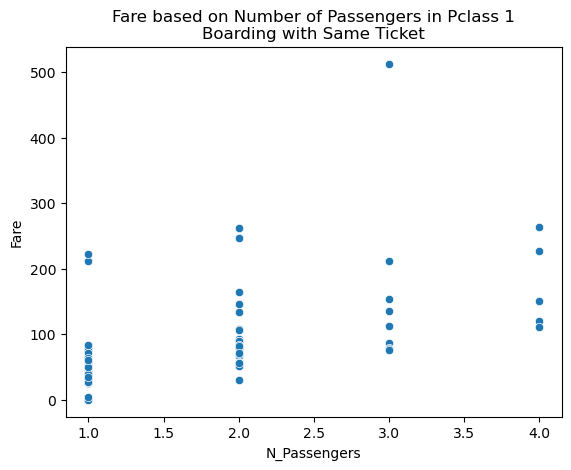

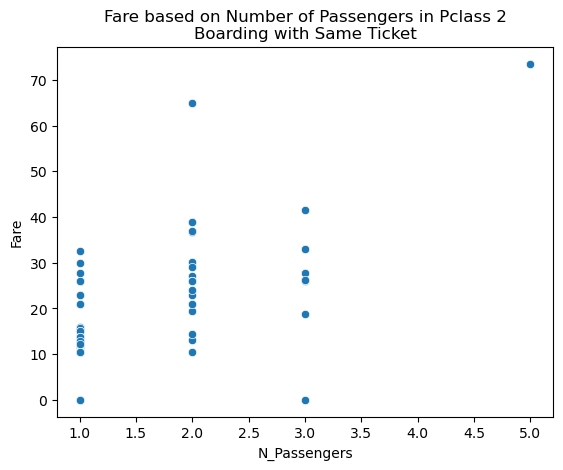

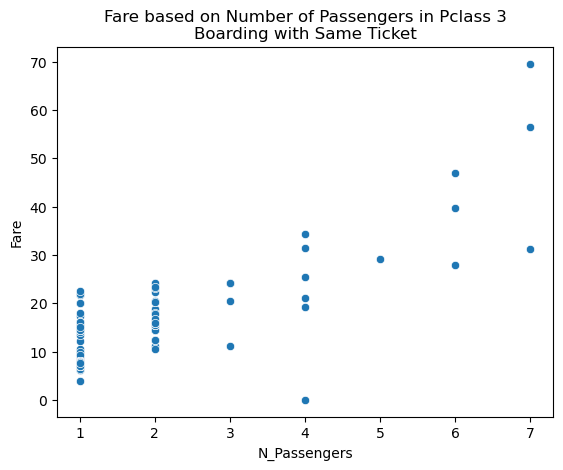

In [75]:
for i in range(1,4):
    plt.figure()
    sns.scatterplot(data=tix_fare[tix_fare.Pclass == i], x='N_Passengers', y='Fare')
    plt.title("Fare based on Number of Passengers in Pclass {}\nBoarding with Same Ticket".format(i))

We saw earlier that `Fare` had a weak positive relationship with `SibSp` and `Parch`. As we saw with the Sage family members, families may have boarded on the same `Ticket` and `Fare`. If this feature were to be used to train a machine learning model, it would be important to note that that this may be a source of multicollinearity, as it may suggest additional information about the other features.

## Processing Data: New Attributes
### Group Age Ranges
We can divide the data set into age groups to get more insight of the age ranges.

In [76]:
agebins = [0,10,20,30,40,50,60,100]
age_bin_labels = ["0-9","10-19", "20-29",\
             "30-39", "40-49", "50-59", "60+"]
titanic["AgeRange"] = pd.cut(titanic['Age'], agebins, right=False, labels=age_bin_labels)

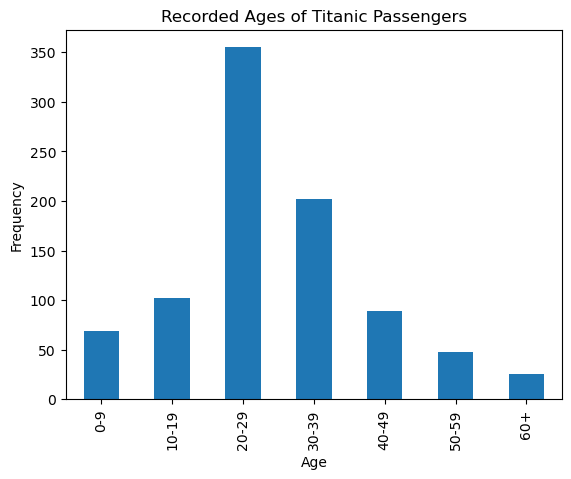

In [77]:
titanic.groupby("AgeRange")["AgeRange"].count().plot(kind="bar")
plt.title('Recorded Ages of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency');

## Analyzing Survived
Similar to how we compared `Age` to different attributes, we will look at the relationship of the other attributes with `Survived`.

For each attribute, we will group passengers into categories to look at:
- The number of passengers that survived in each category
- The percentage of passengers that survived in each category
- How many passengers belonged to each group as a percentage of the overall total passengers on board
- What was the proportion of those who survived in each category was in relation to the total number of survivors

In [78]:
# Memoize dataframe groupings for future calculations
cSurvivedMemo = {"ts": titanic["Survived"].sum(), "tp": len(titanic)}
shortcol = {'PassengerId':'pi', 'Survived':'sur', 'Pclass':'c',
            'Name':'n', 'Sex':'s', 'Age':'a', 'SibSp':'sib',
            'Parch':'p', 'Ticket':'t', 'Fare':'f', 'Embarked':'e',
            'FareRange':'fr', 'AgeRange':'ar'}

def compare_survived(*args):
    '''Displays Series showing counts of passengers survived grouped by input argument columns
    Returns DataFrame with % Survived, % Passengers, Proportion of Survived of grouped passengers
    '''
    try:
        if not len(args):
            raise ValueError
        
        sb = "survivedby"
        nb = "numby"
        
        # Check input arguments are column names of Titanic
        for c in args:
            if c not in titanic.columns:
                raise NameError(c)
            sb += shortcol[c]
            nb += shortcol[c]
        
        # Assuming no changes to data set
        if sb not in cSurvivedMemo:
            cSurvivedMemo[sb] = titanic.groupby([*args])["Survived"].sum()
        if nb not in cSurvivedMemo:
            cSurvivedMemo[nb] = titanic.groupby([*args])["Survived"].count()
            
        # Displays how many passengers per category survived or didn't survive    
        display(titanic.groupby([*args, "Survived"])['Survived'].count())
        
        return pd.DataFrame({"% Survived": cSurvivedMemo[sb]/cSurvivedMemo[nb],
                            "% Passengers": cSurvivedMemo[nb]/cSurvivedMemo["tp"],
                            "Proportion of Survived":cSurvivedMemo[sb]/cSurvivedMemo["ts"]}).style.format("{:.0%}")
    except ValueError:
        print("No arguments given")
    except NameError as e2:
        print("No column named", e2)
    


In [79]:
def survived_bar(groupby):
    '''Plot bar plot of data x, grouped together by groupby
    groupby : list of str'''
    vals = titanic.groupby(groupby + ['Survived'])['Survived'].count().unstack()
    
    vals.plot(kind='bar')
    plt.ylabel('Frequency')
    plt.title('Frequency of Passenger Survival for {}'.format(', '.join(groupby)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Survived')
    
    ((vals.T)/(vals.sum(axis=1))).T\
                    .plot(kind='bar', stacked=True)
    plt.ylabel('Proportion')
    plt.title('Proportion of Passenger Survival for {}'.format(', '.join(groupby)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Survived')

### Survived vs Passenger Class
When we group passengers by their `Pclass` attribute, we see that passengers in 1st class were far more likely to survive than those in 3rd class. **1st class passengers had a 63% survival rate**, whereas 2nd and 3rd class passengers had rates of 47% and 24%, respectively.

1st class passengers only made up 24% of the passengers on board, but accounted for 40% of those who survived. Similarly, 2nd class passengers made up 21% of the passengers on board, but made up 25% of those who survived. 3rd class passengers made up 55% of those on board, but only 35% of those who survived.

In [80]:
compare_survived("Pclass")

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
Pclass,,,
1,63%,24%,40%
2,47%,21%,25%
3,24%,55%,35%


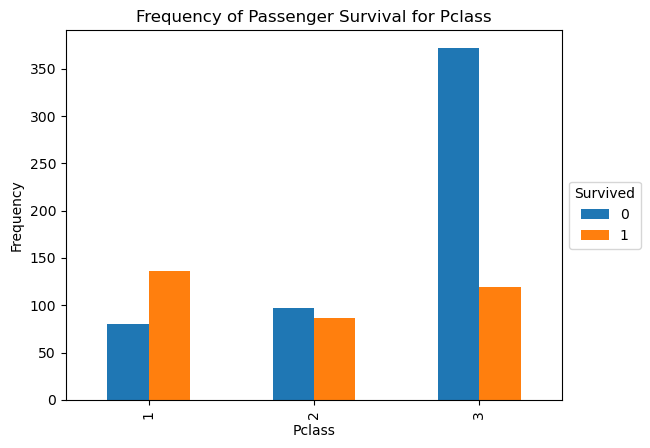

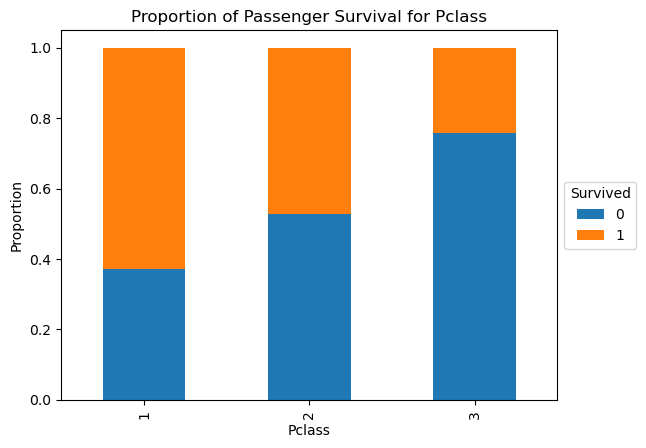

In [81]:
survived_bar(['Pclass'])

### Survived vs Sex
When we group passengers by their `Sex` attribute, we see that female passengers were more likely to survive than male passengers. **74% of the recorded female passengers survived**, whereas only about 19% of the recorded male passengers survived. Although female passengers made up 35% of the passengers on board, they accounted for 68% of the passengers that survived.

In [82]:
compare_survived("Sex")

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
Sex,,,
female,74%,35%,68%
male,19%,65%,32%


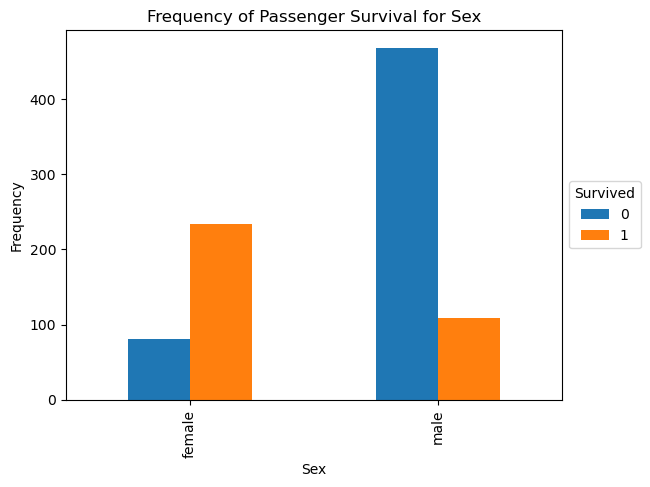

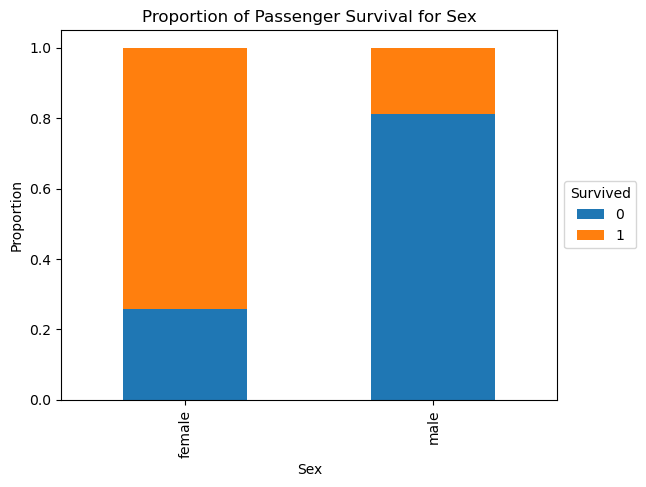

In [83]:
survived_bar(['Sex'])

We can 

### Survived vs Siblings/Spouse
When we group passengers by their `SibSp` attribute, we see that passengers with more siblings were less likely to survive. None of the passengers with 5 or more siblings survived. Passengers recorded with 1 `SibSp` were the most likely to survive, with a 54% survival rate. Despite making up only 23% of the passengers on board, they accounted for 33% of the passengers who survived. Passengers without any `SibSp` accounted for 68% of the passengers on board and had a slightly lower survival rate of 35%, but still accounted for 61% of the passengers who survived.

In [84]:
compare_survived("SibSp")

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
SibSp,,,
0,35%,68%,61%
1,54%,23%,33%
2,46%,3%,4%
3,25%,2%,1%
4,17%,2%,1%
5,0%,1%,0%
8,0%,1%,0%


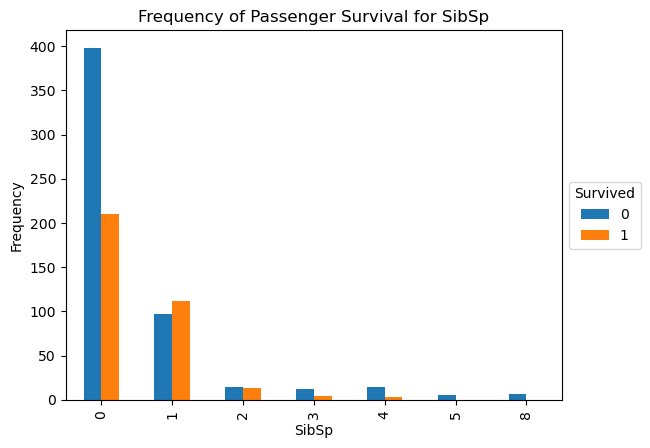

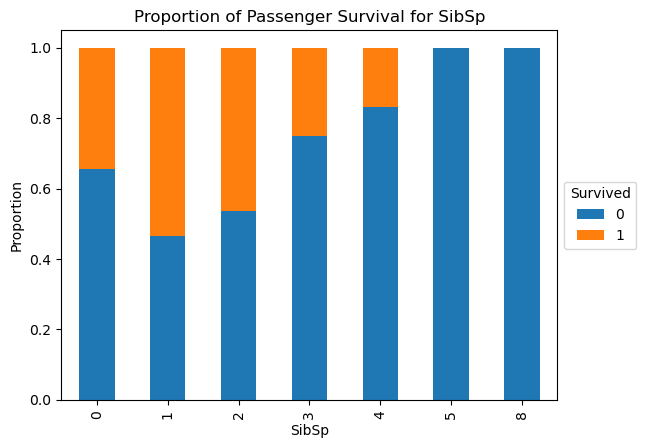

In [85]:
survived_bar(['SibSp'])

### Survived vs Parents/Children
When we group passengers by their `Parch` attribute, we see that passengers with a value of 1-3 were more likely to survive, with survival rates between 50-60%. The few passengers with more children were less likely to survive.

In [86]:
compare_survived("Parch")

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
Parch,,,
0,34%,76%,68%
1,55%,13%,19%
2,50%,9%,12%
3,60%,1%,1%
4,0%,0%,0%
5,20%,1%,0%
6,0%,0%,0%


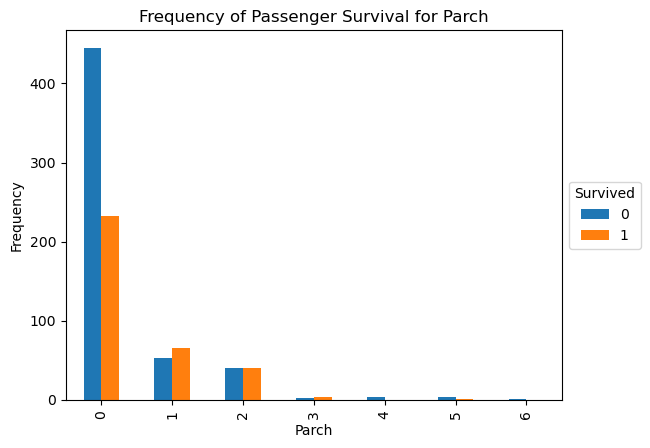

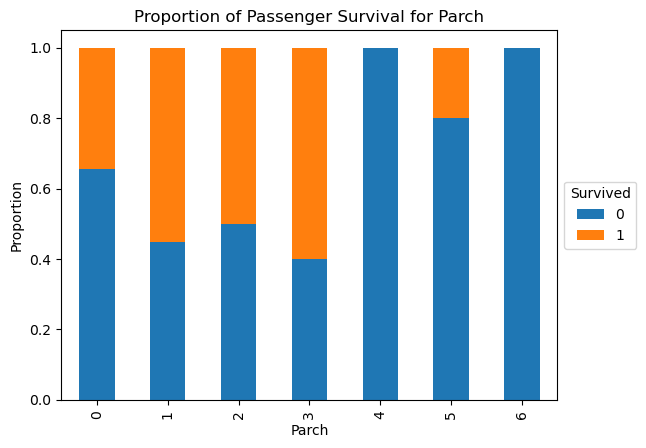

In [87]:
survived_bar(['Parch'])

### Survived vs Port Embarked
Passengers who embarked at "C" Cherbourg had a survival rate of 55%, making up 27% of the passengers who survived, despite accounting for only 19% of the passengers on board. This is higher than passengers who `Embarked` at the other two ports.

This could possibly be explained by the fact that half of the passengers who embarked at Cherbourg were in 1st class, a greater proportion compared to the other ports.

In [88]:
compare_survived("Embarked")

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
Embarked,,,
C,55%,19%,27%
Q,39%,9%,9%
S,34%,73%,64%


In [89]:
titanic.groupby(["Embarked", "Pclass"])["Pclass"].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
Name: Pclass, dtype: int64

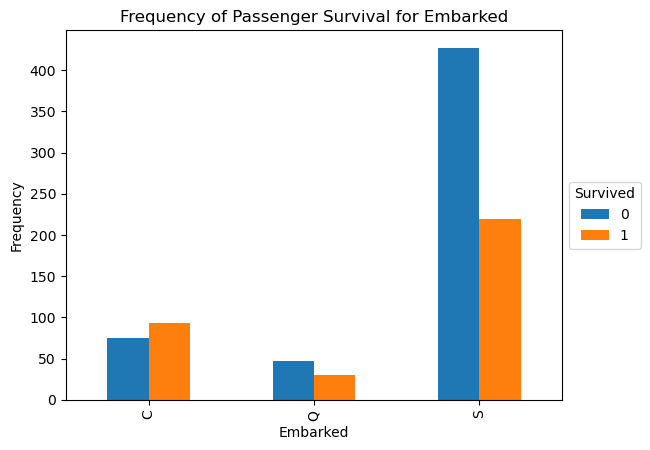

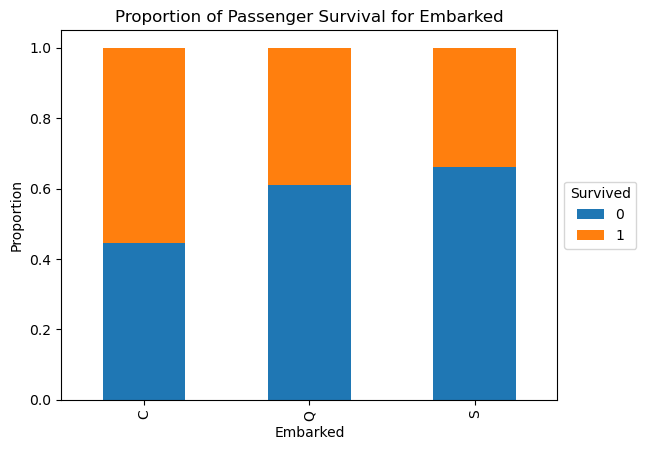

In [90]:
survived_bar(['Embarked'])

### Survived vs Age Range
Passengers between the ages of "0-9" were the most likely to survive with a survival rate of 55%. `AgeRange` does not appear to significantly impact survival rate. The proportions of those who survived grouped by `AgeRange` appear similar the proportion of all passengers grouped by `AgeRange`.

In [91]:
compare_survived("AgeRange")

AgeRange  Survived
0-9       0            31
          1            38
10-19     0            61
          1            41
20-29     0           241
          1           114
30-39     0           114
          1            88
40-49     0            55
          1            34
50-59     0            28
          1            20
60+       0            19
          1             7
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
AgeRange,,,
0-9,55%,8%,11%
10-19,40%,11%,12%
20-29,32%,40%,33%
30-39,44%,23%,26%
40-49,38%,10%,10%
50-59,42%,5%,6%
60+,27%,3%,2%


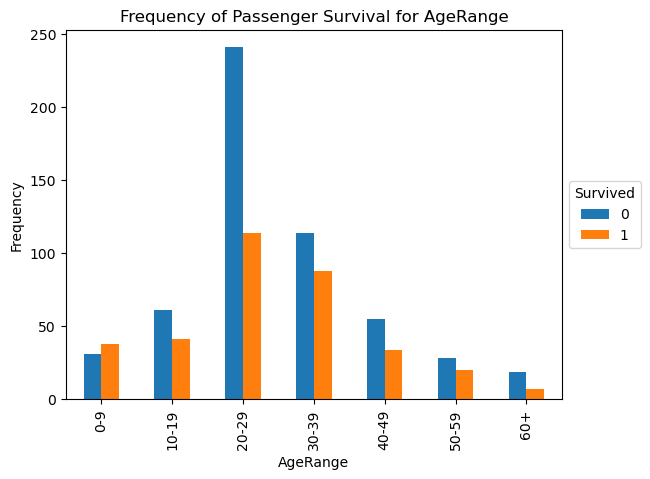

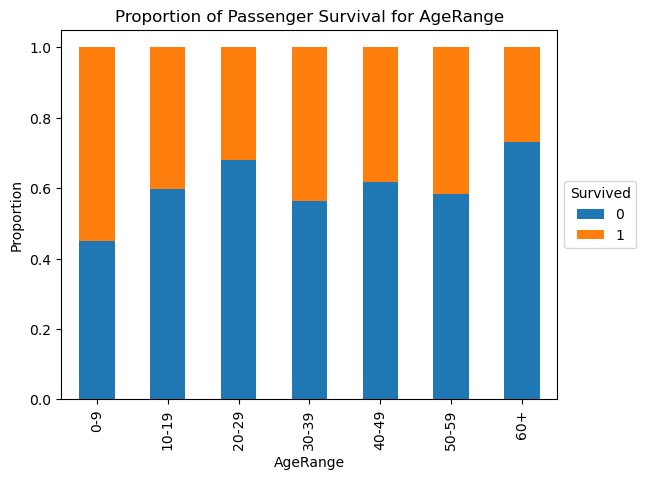

In [92]:
survived_bar(['AgeRange'])

### Survived vs FareRange
**The more a passenger paid more for their tickets, the more likely they were to survive.** However, the members of the Sage family did not survive despite also paying '50+'.

We do have to note that the `Fare` reflect

In [93]:
compare_survived("FareRange")

FareRange  Survived
0          0            14
           1             1
0-10       0           255
           1            66
10-25      0           128
           1            93
25-50      0           100
           1            73
50+        0            43
           1           104
50+A       0             2
           1             5
50+S       0             7
Name: Survived, dtype: int64

,% Survived,% Passengers,Proportion of Survived
FareRange,,,
0,7%,2%,0%
0-10,21%,36%,19%
10-25,42%,25%,27%
25-50,42%,19%,21%
50+,71%,16%,30%
50+A,71%,1%,1%
50+S,0%,1%,0%


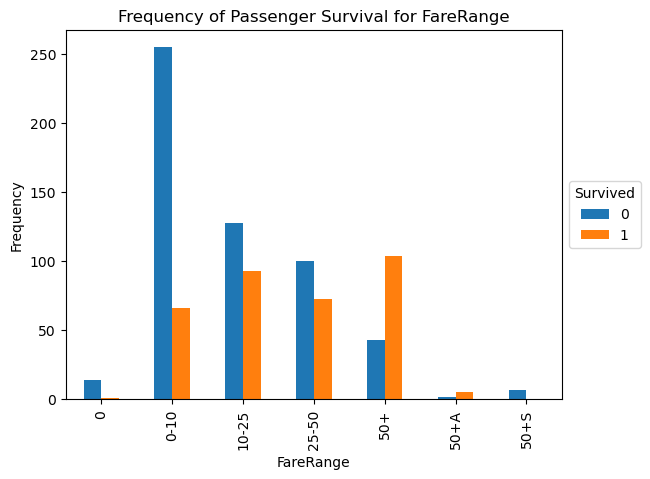

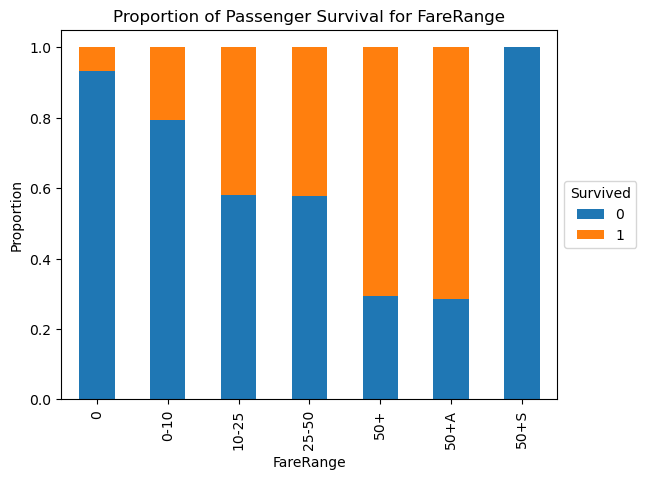

In [94]:
survived_bar(['FareRange'])

### Survived vs Pclass and Sex
When we look at `Pclass` and `Sex` together, we find that **female passengers of 1st and 2nd class were the most likely to survive**, with survival rates over 90%. We see the overall trends that female passengers were more likely to survive than male passengers. Furthermore, 1st class passengers were more likely to survive than 3rd class passengers.

In [95]:
compare_survived("Sex","Pclass")

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

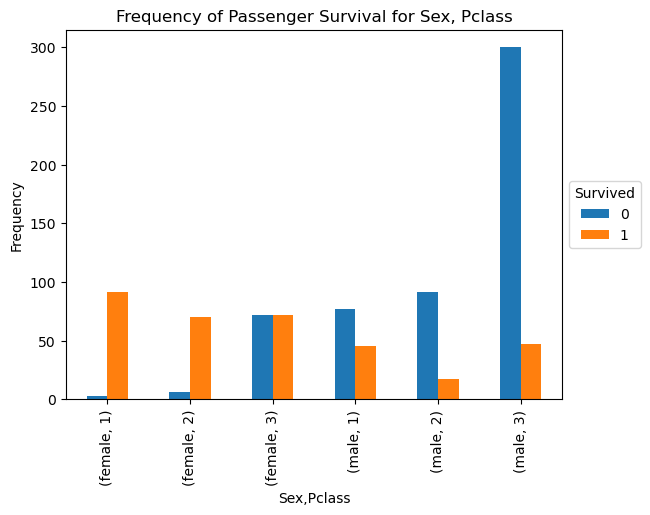

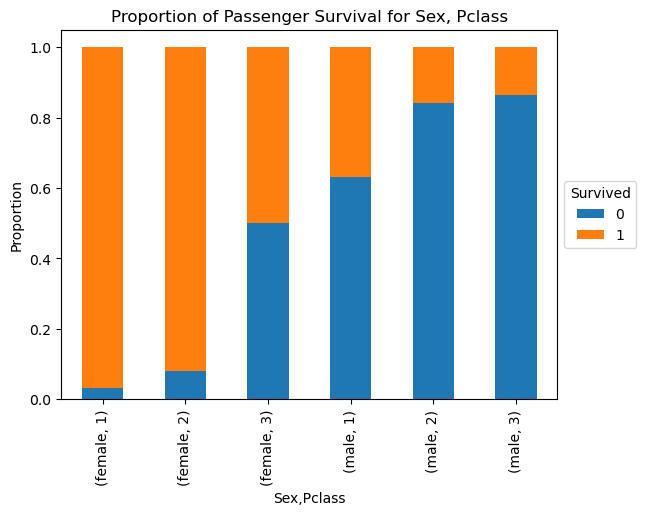

In [96]:
survived_bar(['Sex', 'Pclass'])

### Survived vs AgeRange and Siblings
Grouping passengers by `AgeRange` and `SibSp` resulted in many categories with very small sample sizes, some containing no passengers at all. Only passengers recorded to be under 20 years old were recorded with 4 or more siblings. Children between "0-9" with less than 3 siblings had survival rates over 80%.

In [97]:
compare_survived("AgeRange", "SibSp")

AgeRange  SibSp  Survived
0-9       0      0            1
                 1           14
          1      0            2
                 1           17
          2      0            1
                             ..
60+       4      1            0
          5      0            0
                 1            0
          8      0            0
                 1            0
Name: Survived, Length: 98, dtype: int64

### Survived vs AgeRange and FareRange
When we group passengers by `FareRange` and `AgeRange`, we see the general trend of increased survival by passengers who paid more or if they were younger in age (between 0-9). However, we also notice how these groups have very few data points, so the differences in survival rates may not be very meaningful.

In [98]:
compare_survived("AgeRange", "FareRange")

AgeRange  FareRange  Survived
0-9       0          0           0
                     1           0
          0-10       0           0
                     1           1
          10-25      0           5
                                ..
60+       50+        1           4
          50+A       0           0
                     1           0
          50+S       0           0
                     1           0
Name: Survived, Length: 98, dtype: int64

### Survived vs Sex and AgeRange
When looking at both the `Age` and `Sex`, we find that female passengers in general were more likely to survive. **Older women over 50 had the highest survival rate**, whereas younger female passengers were the less likely to survive. On the other hand, **male passengers between "0-9" were the most likely to survive compared to other age groups**, with a survival rate of 53%, whereas all other age categories of male passengers were between 12-22%.

In [99]:
compare_survived("Sex","AgeRange")

Sex     AgeRange  Survived
female  0-9       0            14
                  1            19
        10-19     0            11
                  1            34
        20-29     0            31
                  1            78
        30-39     0            13
                  1            60
        40-49     0            10
                  1            22
        50-59     0             2
                  1            16
        60+       0             0
                  1             4
male    0-9       0            17
                  1            19
        10-19     0            50
                  1             7
        20-29     0           210
                  1            36
        30-39     0           101
                  1            28
        40-49     0            45
                  1            12
        50-59     0            26
                  1             4
        60+       0            19
                  1             3
Name: Survived, dtype

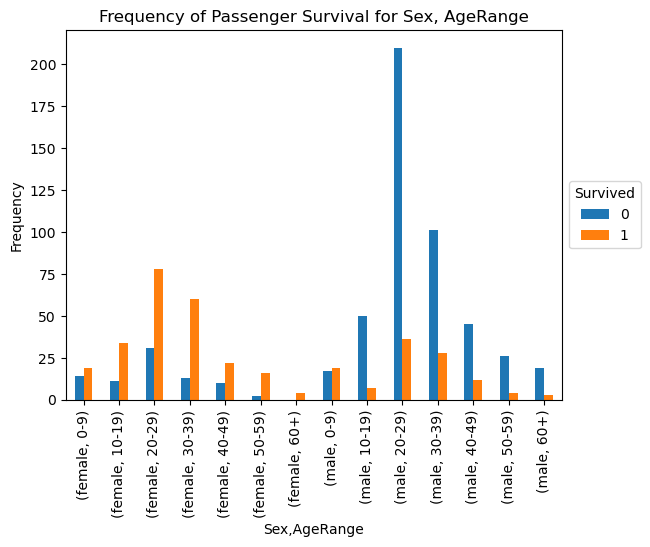

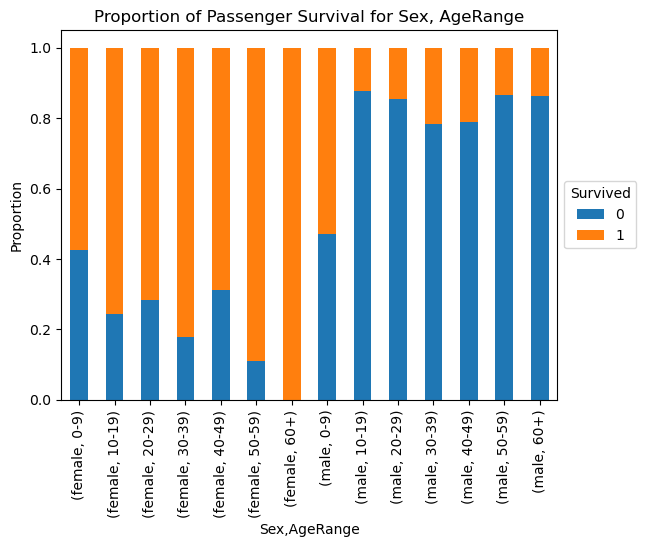

In [100]:
survived_bar(['Sex','AgeRange'])

### Survived vs Sex and FareRange
When we look at `Sex` and `FareRange` attributes together, we see that **almost all females who paid "50+" survived** (excluding the Sage family members). We also notice that although higher `Fare` correlated with higher chance of survival, male passengers paying "50+" only had a 35% survival rate. There is a noticeable outlier where male passengers of Asian descent had a survival rate of 71%.

In [101]:
compare_survived("Sex","FareRange")

Sex     FareRange  Survived
female  0-10       0            26
                   1            38
        10-25      0            29
                   1            71
        25-50      0            21
                   1            42
        50+        0             2
                   1            82
        50+S       0             3
male    0          0            14
                   1             1
        0-10       0           229
                   1            28
        10-25      0            99
                   1            22
        25-50      0            79
                   1            31
        50+        0            41
                   1            22
        50+A       0             2
                   1             5
        50+S       0             4
Name: Survived, dtype: int64

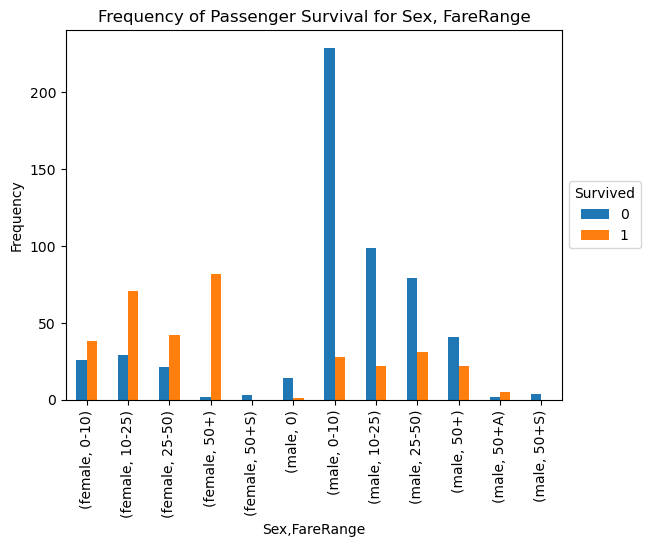

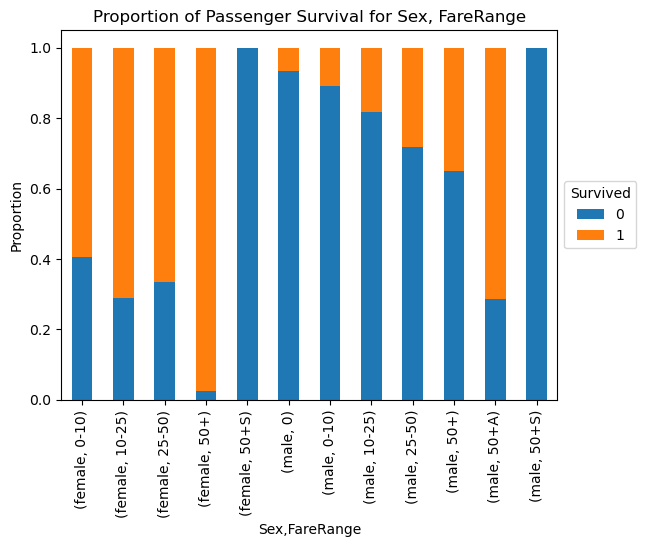

In [102]:
survived_bar(['Sex', 'FareRange'])

### Survived vs Sex, Pclass and AgeRange
When we look at `Sex`, `Pclass` and `AgeRange` attributes altogether, we see again that female passengers of 1st and 2nd class were more likely to survive without significant difference between ages. We also notice that **young male passengers of 1st and 2nd class between the ages "0-9" were the most likely to survive among all male passengers**. However, there were only a few such passengers.

In [103]:
compare_survived('Sex','Pclass','AgeRange')

Sex     Pclass  AgeRange  Survived
female  1       0-9       0            1
                          1            0
                10-19     0            0
                          1           13
                20-29     0            1
                                      ..
male    3       40-49     1            2
                50-59     0            6
                          1            0
                60+       0            4
                          1            0
Name: Survived, Length: 84, dtype: int64

### Survived vs Sex, Pclass and FareRange
When looking at the `Sex`, `Pclass` and `FareRnage` together, we see that female passengers of 1st and 2nd class, paying a higher `Fare` correlated with only a slight increase in survival.

Higher `fare` does not appear to significantly increase survival rate when also taking `Sex` and `Pclass` into account. We can see how:
- 2nd class males who paid 50+ `Fare` were less likely to survive than 2nd class males who paid a `Fare` <50
- 3rd class passengers of both `Sex` who paid 25-50 `Fare` were less likely to survive than 3rd class passengers who paid a `Fare` <25

In [104]:
compare_survived('Sex','Pclass','FareRange')

Sex     Pclass  FareRange  Survived
female  1       25-50      0             1
                           1            11
                50+        0             2
                           1            80
        2       10-25      0             4
                           1            39
                25-50      0             2
                           1            29
                50+        1             2
        3       0-10       0            26
                           1            38
                10-25      0            25
                           1            32
                25-50      0            18
                           1             2
                50+S       0             3
male    1       0          0             5
                0-10       0             1
                25-50      0            35
                           1            23
                50+        0            36
                           1            22
        2       0 

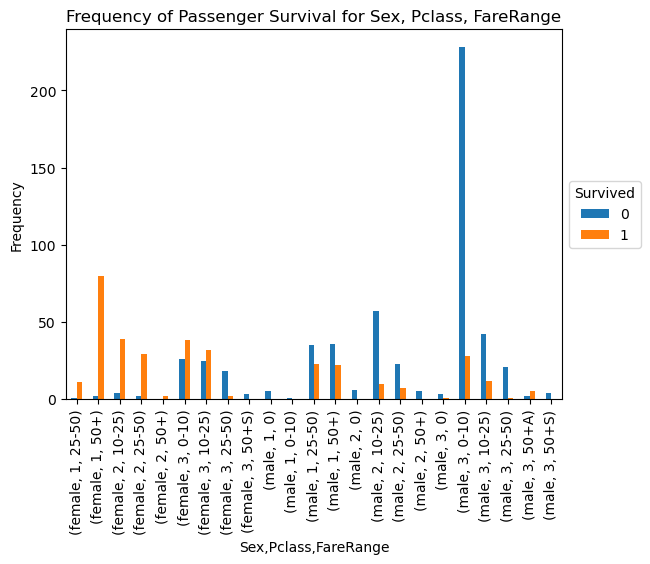

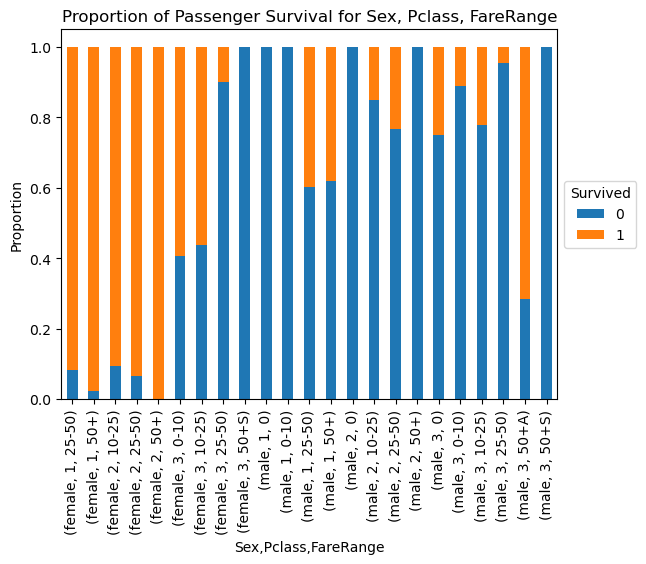

In [105]:
survived_bar(['Sex', 'Pclass', 'FareRange'])

## Visualizing Data: Age and Fare
We visualize the `Age` and `Fare` of passengers, as well as other features through changing the marker properties, such as hue, size and style. We can see there were a handful of passengers that paid a `Fare` greater than '200' who were all in 1st class.

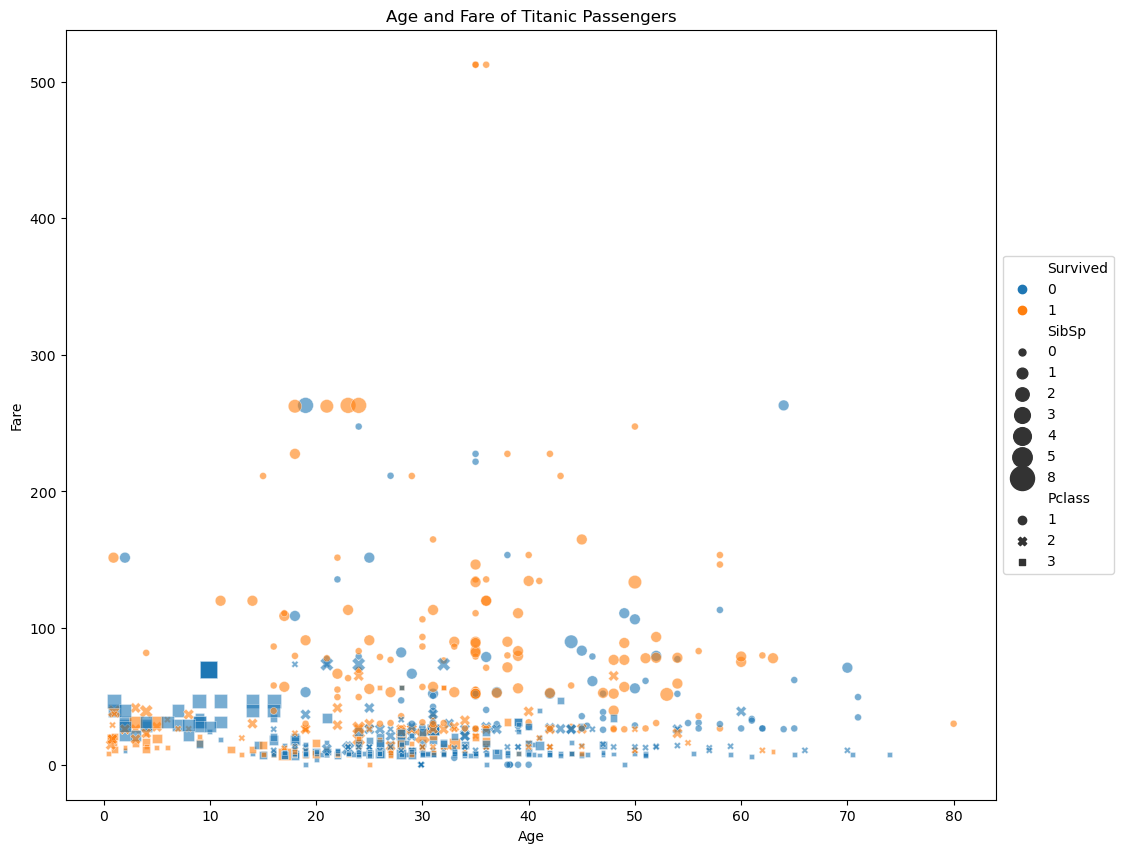

In [106]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=titanic,
                x='Age',
                y='Fare',
                hue='Survived',
                size='SibSp', sizes=(25, 300),
                style='Pclass',
                alpha=0.6,
                legend='full')
plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
plt.title('Age and Fare of Titanic Passengers');

In [107]:
titanic[titanic.Fare > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareRange,AgeRange
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,50+,10-19
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,50+,20-29
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C,50+,20-29
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,50+,30-39
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C,50+,50-59
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C,50+,10-19
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S,50+,20-29
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C,50+,20-29
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C,50+,40-49
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S,50+,60+


When we look at only passengers that paid a `Fare` of more than 200 who were all in first class, we can see that:
- All the female passengers who paid a `Fare` >= 200 survived
- Male passengers recorded with a `Fare` >= 200 did not survive, unless if they had paid a `Fare` > 500.

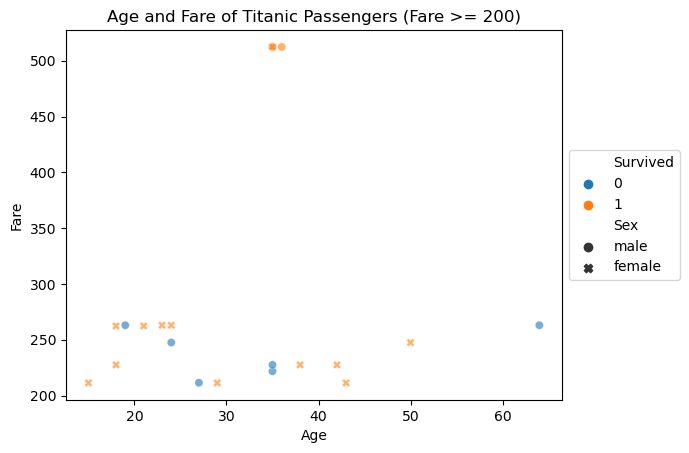

In [108]:
sns.scatterplot(data=titanic[(titanic.Fare >= 200)],
                x='Age',
                y='Fare',
                hue='Survived',
                style='Sex',
                alpha=0.6)
plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
plt.title('Age and Fare of Titanic Passengers (Fare >= 200)');

We can separate out these passengers to be able to see the remaining data at a different scale by using a smaller range along the `Fare` axis.

We can also separate the passengers by `Sex` to produce two different scatter plots.

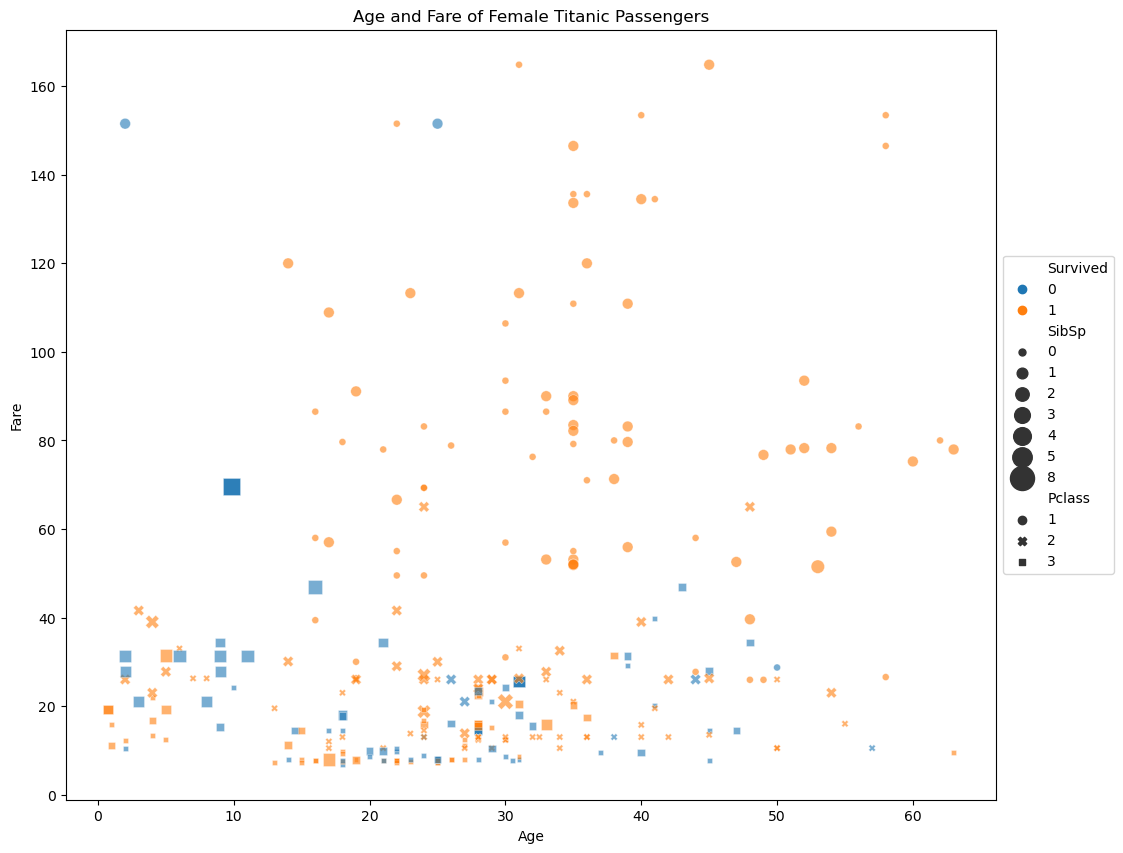

In [109]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=titanic[(titanic.Sex == 'female') & (titanic.Fare < 200)],
                x='Age',
                y='Fare',
                hue='Survived',
                size='SibSp', sizes=(25, 300),
                style='Pclass',
                alpha=0.6,
                legend='full')
plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
plt.title('Age and Fare of Female Titanic Passengers');

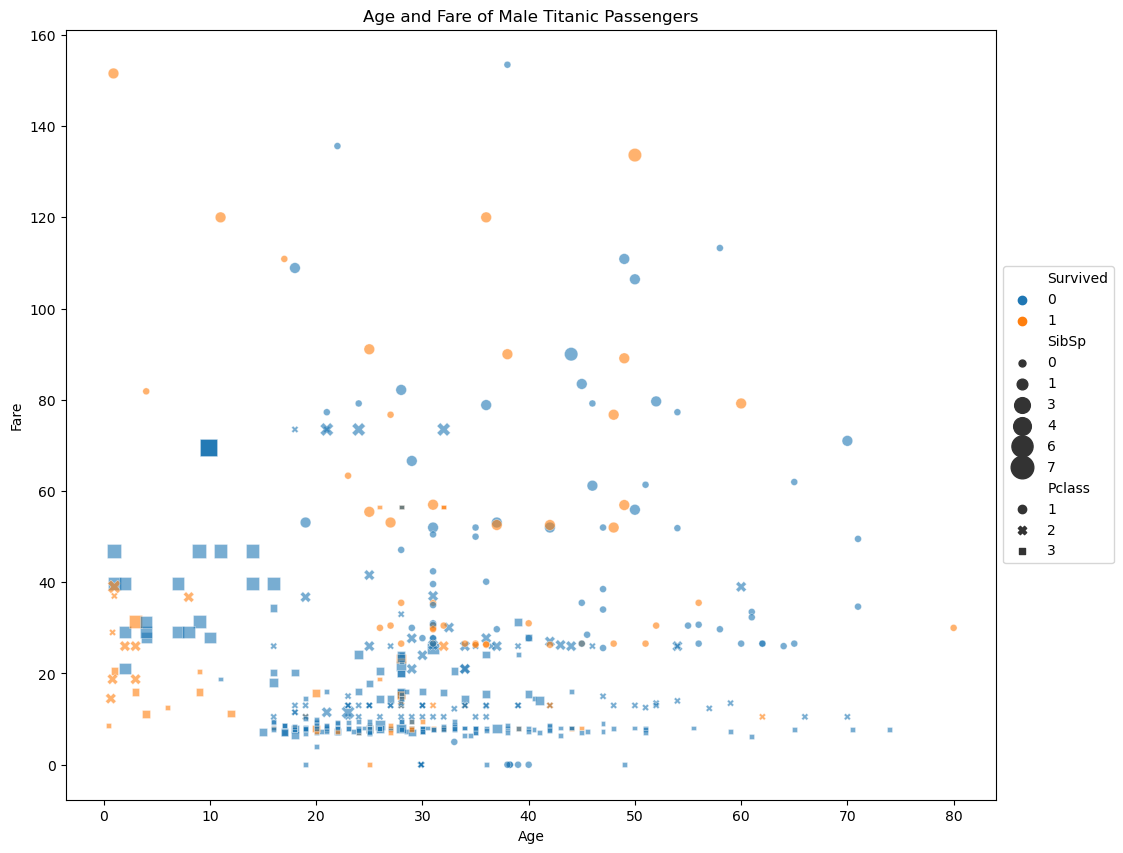

In [110]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=titanic[(titanic.Sex == 'male') & (titanic.Fare < 200)],
                x='Age',
                y='Fare',
                hue='Survived',
                size='SibSp', sizes=(25, 300),
                style='Pclass',
                alpha=0.6)
plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
plt.title('Age and Fare of Male Titanic Passengers');

Looking at the two scatter plots, we can immediately notice that patterns that we observed earlier:
- Passengers with more `SibSp` tended to be younger (larger-sized points on the left side of the scatter plots)

Female passengers:
- More likely to survive (greater proportion of orange points corresponding to passengers who survived)
- Most 1st class and 2nd class female passengers survived (more orange circle and x points)
- Smaller proportion of 3rd class passengers survived (more blue square points)
    - 3rd class passengers who paid a `Fare` over 50 around `Age` 10 (Sage family members) did not survive

Male passengers:
- Less likely to survive (smaller proportion of orange points)
- However, there is still a cluster of younger male passengers (`Age` 0-10) who did survive in the bottom left corner
- 3rd class passengers in their 20-30s who paid a `Fare` over 50, corresponding to passengers of Asian descent, many of whom survived
    - 3rd class passengers who paid a `Fare` over 50 around `Age` 10 corresponding to Sage family members, who did not survive

***
# Summary
For each attribute used in the analysis, passengers were divided into categorical groups to compare with `Survived` to see:
- How many passengers survived in each group
- What percentage of those in the group survived (in the training data set)
- How many passengers belong to each group
- What was the proportion of those who survived in each category, in relation to the total number of survivors

When we grouped passengers by `Pclass`, passengers of **higher class (1st class) were more likely to survive than those of lower class (3rd class)**. The survival rates of 1st, 2nd and 3rd passengers were 63%, 47% and 24%, respectively. 1st class passengers made up 40% of the survivors despite only making up 24% of the passengers on board. 

When we grouped passengers by `Sex`, **female passengers were far more likely to survive than male passengers**. Female passengers had a survival rate of 74%, making up 68% of the survivors despite making up only 35% of the passengers on board. This contrasts with the male survival rate of 19%, making up only 32% of the survivors, despite accounting for 65% of the passengers on board.

When we consider these two attributes together, **female passengers in 1st class had the highest survival rate of 97%**, making up 27% of the survivors (the largest proportion when grouping passengers by `Sex` and `Pclass`), despite making up only 11% of the passengers on board. Female passengers in 2nd class followed behind with a survival rate of 92%, making up 20% of the survivors despite making up 9% of the passengers on board.

## Other attributes
`Age` was divided into different `AgeRange` intervals. At first glance, it looked as if younger passengers in the "0-9" age group were most likely to survive with a survival rate of 55%, whereas all other age groups had survival rates under 45%. 

However, when looking at `AgeRange` with the `Sex` attribute together, we found instead that female passengers were less likely to survive in the "0-9" age group compared to the other age groups. On the other hand, younger male passengers under "0-9" had a higher survival rate of 53%, whereas male passengers in other age groups had survival rates under 25%.

We note that as a result from filling in missing values, there may be some inaccuracies when comparing using the `Age` feature.


`SibSp` indicates the number of siblings/spouse a passenger had on board. Passengers with 1-2 sibling(s) had a higher survival rate than those with more siblings. Passengers with 1 or 2 siblings a survival rate of 54% and 46%, respectively. The majority (68%) of passengers in the data set had a `SibSp` value of 0. These passengers accounted for 61% of those who survived, but the group only had a survival rate of 35%. When we also considered `Age`, the survival rates of passengers between "0-9" with 0-2 siblings were 83% and up, but only accounted for about 10% of the passengers who survived.

`Parch` indicates the number of parents/children a passenger had on board. Passengers with 1-3 `Parch` had a slightly higher survival rate (50-60%) than passengers with none or more than 3 (<34%). However, only a few passengers boarded with a `Parch` greater than 2.

`Fare` was divided into `FareRange` intervals of "0-10", "10-25", "25-50", and "50+". At first glance, the more a passenger paid for their tickets, the more likely they were to survived. However, we noticed that multiple passengers may have boarded on the same `Ticket` and so the recorded `Fare` may cover multiple passengers as well. Therefore, `Fare` may not necessarily refer to the `Fare` per individual passenger.

When we grouped passengers by `Fare` and `Sex`, we found that almost all females who were recorded with "50+" `Fare` survived. Male passengers who paid "50+" were more likely to survive compared to those who paid less, but only had a 35% survival rate.

We noticed there were also outliers of passengers that were recorded with '50+' `Fare` but were in 3rd class. This included the Sage family who did not survive, as well as [the male passengers of Asian descent, who had a survival rate of 71%.](https://www.bbc.com/news/world-us-canada-56755614)

When we considered `Sex`, `Pclass` and `FareRange` together, we found instead that 3rd class passengers of both sexes who paid a `Fare` of '25-50' had a lower survival rate than 3rd class passengers who paid less. This suggests that higher `Fare` paid did not always correspond with a higher survival rate. This suggests that `Pclass` may be more important at predicting survival than `Fare`.

**Overall, we have found `Sex` and `Pclass` appear to be the most important features at determining whether or not the passengers survived.**